---
## **Analisis dan Visualisasi Data Sentimen Debat Pertama**
---
## **Penulis**
> 1. Marastrika Farhan Nur Haiban


---
## **Business Understanding**
>
---



**Problem**

1. Kurangnya Pemahaman Mendalam: Terbatasnya pemahaman tentang bagaimana opini publik terbentuk dan berubah selama debat capres-cawapres di platform X. Hal ini menjadi penghambat utama dalam strategi komunikasi politik yang efektif.
2. Efisiensi Analisis Data: Keterbatasan teknis dalam mengelola dan menganalisis jumlah data besar dari media sosial dengan cara yang efisien dan efektif, yang menghambat kemampuan untuk memanfaatkan sepenuhnya data yang tersedia.

**Goals**
1. Pemahaman Dinamika Opini: Meningkatkan pemahaman tentang dinamika opini publik dengan menganalisis sentimen dan reaksi terhadap debat capres-cawapres. Tujuan ini meliputi identifikasi sentimen positif, negatif, dan netral serta mengklasifikasikan kandidat paslon 1,2,3 berdasarkan identifikasi sentimen
2. Optimalisasi Metode Analisis: Mengoptimalkan metode analisis data untuk meningkatkan kecepatan dan akurasi dalam memproses dan menganalisis data besar dari media sosial. Penelitian ini berusaha menentukan metode yang lebih efektif antara lexicon-based dan Random Forest dalam konteks data yang sangat dinamis dan beragam.

**Solution**
1. Analisis Sentimen Terperinci: Melakukan analisis sentimen secara komprehensif untuk memetakan opini publik dan reaksi mereka terhadap debat capres-cawapres menggunakan teknik analisis data.
2. Perbandingan Teknik Analisis: Membuat perbandingan langsung antara metode lexicon-based dan Random Forest, untuk menilai manakah yang lebih efisien dan akurat dalam analisis sentimen pada data sosial media.
3. Visualisasi Data dengan Tableau: Penggunaan Tableau untuk menciptakan visualisasi data yang interaktif dan mudah dipahami, yang memungkinkan pemangku kepentingan untuk melihat hasil analisis dengan cara yang lebih intuitif.
4. Evaluasi Strategi Komunikasi: Menggunakan insight dari analisis untuk merekomendasikan strategi komunikasi yang lebih efektif bagi kandidat politik, berdasarkan pemahaman yang lebih baik tentang preferensi dan reaksi pemilih.

### Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/data/Debat 1

/content/drive/MyDrive/data/Debat 1


### Import Library

In [ ]:
# Import Library dan Package Utama
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import datetime as dt
from glob import glob
import subprocess
import os
!pip install matplotlib
import matplotlib.pyplot as plt
# Import Library dan Package NLP
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from PIL import Image
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install deep-translator
from deep_translator import GoogleTranslator
# Import Library dan Package Lexicon Based
nltk.download('punkt')
nltk.download('vader_lexicon')
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
# Import Library dan Package Model Random Forest
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


###Crawling/Scraping Data

In [ ]:
#@title Twitter Auth Token

twitter_auth_token = 'debaeaebec0ac35c00624aa006110b559a374aa3'

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

In [ ]:
# Daftar keywords dengan konfigurasi masing-masing
keywords_config = {
    "debat pertama min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "debat_pertama.csv"},
    "debat capres min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "debat_capres.csv"},
    "debat cawapres min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "debat_cawapres.csv"},
    "debat pilpres min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "debat_pilpres.csv"},
    "pilpres 2024 min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "pilpres.csv"},
    "tema pemerintahan min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "tema_pemerintahan.csv"},
    "tema hukum min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "tema_hukum.csv"},
    "tema hak asasi manusia min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "tema_HAM.csv"},
    "tema pemberantasan korupsi min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "tema_pemberantasan_korupsi.csv"},
    "tema penguatan demokrasi min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "tema_penguatan_demokrasi.csv"},
    "tema peningkatan layanan publik min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "tema_peningkatan_layanan_publik.csv"},
    "tema kerukunan warga min_replies:1 lang:id until:2023-12-21 since:2023-12-12": {"filename": "tema_kerukunan_warga.csv"},
}

limit = 900

for keyword, config in keywords_config.items():
    filename = config["filename"]
    search_keyword = keyword.replace(" ", "+")

    command = f'npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}'

    try:
        subprocess.run(command, shell=True, check=True)
        print(f"Crawling data untuk keyword '{keyword}' selesai.")

        file_path = f"tweets-data/{filename}"

        if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
            try:
                df = pd.read_csv(file_path, delimiter=",", on_bad_lines='warn')
                if not df.empty:
                    print(f"Jumlah tweet dalam dataframe '{filename}' adalah {len(df)}.")
                else:
                    print(f"File '{filename}' ada tetapi kosong.")
            except pd.errors.EmptyDataError:
                print(f"File '{filename}' kosong atau format tidak sesuai.")
        else:
            print(f"File '{file_path}' tidak ditemukan atau kosong.")

    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

---
## **Data Understanding**
---

In [ ]:
#@title Read to Data
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data Raw/Sentimen/Debat1.csv'

debat = pd.read_csv(path_to_csv)
debat.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,source_filename
0,1737341378764677545,Wed Dec 20 05:17:17 +0000 2023,917,Selain debat capres cawapres sebenernya perlu ...,1737341378764677545,NaN,NaN,in,NaN,65,53,221,https://twitter.com/rayestu/status/17373413787...,76984137,rayestu,/content/drive/MyDrive/data/Debat 1/tweets-dat...
1,1737335934901964903,Wed Dec 20 04:55:39 +0000 2023,11,Anakku Gen-Z mengira debat capres kemarin adal...,1737335934901964903,NaN,NaN,in,Indonesia,0,1,3,https://twitter.com/arifin34533/status/1737335...,1420219650231574533,arifin34533,/content/drive/MyDrive/data/Debat 1/tweets-dat...
2,1737329517788897444,Wed Dec 20 04:54:54 +0000 2023,0,@grumpycatto_ Anjay serasa debat capres wkwkwk,1737335744019247463,NaN,grumpycatto_,in,NaN,0,1,0,https://twitter.com/A_yaqin31/status/173733574...,383739624,A_yaqin31,/content/drive/MyDrive/data/Debat 1/tweets-dat...
3,1737333773036089437,Wed Dec 20 04:47:04 +0000 2023,16,Gimana sih kesan warganet terhadap debat capre...,1737333773036089437,https://pbs.twimg.com/media/GBw_2iZbAAAgBis.jpg,NaN,in,NaN,1,4,8,https://twitter.com/kumparan/status/1737333773...,759692754985242625,kumparan,/content/drive/MyDrive/data/Debat 1/tweets-dat...
4,1737329203471950323,Wed Dec 20 04:28:54 +0000 2023,149,Calon wakil presiden (cawapres) nomor urut 1 M...,1737329203471950323,https://pbs.twimg.com/media/GBw7s3KagAA00Dr.jpg,NaN,in,"Pulo Gadung, Indonesia",2,216,46,https://twitter.com/tvOneNews/status/173732920...,55507370,tvOneNews,/content/drive/MyDrive/data/Debat 1/tweets-dat...


### Data Characteristics


- `conversation_id_str`
Tipe Data: int64
Deskripsi: Identifikasi unik untuk setiap percakapan atau thread dalam konteks media sosial atau platform diskusi. Ini adalah angka integer yang bertindak sebagai primary key untuk mengidentifikasi percakapan secara unik.
- `created_at`
Tipe Data: datetime64[ns, UTC]
Deskripsi: Timestamp yang menunjukkan waktu pembuatan entri atau tweet. Waktu disimpan dalam UTC (Coordinated Universal Time) dengan presisi nanosekon.
- `date_day`
Tipe Data: int32
Deskripsi: Representasi hari dari tanggal created_at, diambil sebagai integer yang menunjukkan hari dalam bulan (1-31).
- `date_month`
Tipe Data: int32
Deskripsi: Representasi bulan dari tanggal created_at, diambil sebagai integer yang menunjukkan bulan dalam tahun (1-12).
- `date_year`
Tipe Data: int32
Deskripsi: Representasi tahun dari tanggal created_at, diambil sebagai integer yang menunjukkan tahun.
- `date`
Tipe Data: datetime64[ns]
Deskripsi: Kolom tanggal yang menunjukkan tanggal eksplisit tanpa informasi waktu, sering digunakan untuk analisis berbasis tanggal tanpa mempertimbangkan waktu spesifik.
- `favorite_count`
Tipe Data: int64
Deskripsi: Jumlah favorit atau 'likes' yang diterima entri atau tweet. Ini adalah indikator popularitas atau penerimaan positif dari konten.
- `full_text`
Tipe Data: object (biasanya string)
Deskripsi: Teks lengkap dari entri atau tweet. Ini bisa berisi teks yang dikirim oleh pengguna atau teks dari sebuah artikel atau postingan.
- `id_str`
Tipe Data: int64
Deskripsi: ID unik untuk entri atau tweet, serupa dengan conversation_id_str tetapi spesifik untuk setiap postingan atau tweet.
- `image_url`
Tipe Data: object (string)
Deskripsi: URL gambar yang terkait dengan tweet atau postingan. Kolom ini hanya diisi jika ada gambar yang terkait.
- `in_reply_to_screen_name`
Tipe Data: object (string)
Deskripsi: Nama pengguna dari akun yang di-reply oleh tweet atau entri. Ini memberikan konteks percakapan.
- `lang`
Tipe Data: object (string)
Deskripsi: Kode bahasa dari teks entri atau tweet, misal 'en' untuk Inggris, 'fr' untuk Prancis, dll.
- `location`
Tipe Data: object (string)
Deskripsi: Lokasi geografis dari pengguna atau di mana tweet diposting. Bisa jadi tidak spesifik atau kosong.
- `quote_count`
Tipe Data: int64
Deskripsi: Jumlah kali entri atau tweet telah di-quote oleh pengguna lain.
- `reply_count`
Tipe Data: int64
Deskripsi: Jumlah balasan yang diterima tweet atau postingan.
- `retweet_count`
Tipe Data: int64
Deskripsi: Jumlah kali tweet atau entri telah di-retweet oleh pengguna lain.
- `tweet_url`
Tipe Data: object (string)
Deskripsi: URL permanen dari tweet atau entri, memungkinkan akses langsung ke konten tersebut.
- `user_id_str`
Tipe Data: int64
Deskripsi: ID numerik pengguna yang membuat entri atau tweet.
- `username`
Tipe Data: object (string)
Deskripsi: Nama pengguna dari individu atau entitas yang memposting tweet.
- `source_filename`
Tipe Data: object (string)
Deskripsi: Nama file sumber dari mana data diimpor, berguna untuk melacak asal data dalam kasus analisis multi-sumber.




In [ ]:
debat.shape

(3562, 16)

---
## **Data Preparation**
---

### Data Cleaning

In [ ]:
#@title Read to Data
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data Raw/Sentimen/Debat1.csv'

debat = pd.read_csv(path_to_csv)
debat.head(2)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,source_filename
0,1737341378764677545,Wed Dec 20 05:17:17 +0000 2023,917,Selain debat capres cawapres sebenernya perlu ...,1737341378764677545,NaN,NaN,in,NaN,65,53,221,https://twitter.com/rayestu/status/17373413787...,76984137,rayestu,/content/drive/MyDrive/data/Debat 1/tweets-dat...
1,1737335934901964903,Wed Dec 20 04:55:39 +0000 2023,11,Anakku Gen-Z mengira debat capres kemarin adal...,1737335934901964903,NaN,NaN,in,Indonesia,0,1,3,https://twitter.com/arifin34533/status/1737335...,1420219650231574533,arifin34533,/content/drive/MyDrive/data/Debat 1/tweets-dat...


In [ ]:
debat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      3562 non-null   int64 
 1   created_at               3562 non-null   object
 2   favorite_count           3562 non-null   int64 
 3   full_text                3562 non-null   object
 4   id_str                   3562 non-null   int64 
 5   image_url                1098 non-null   object
 6   in_reply_to_screen_name  1014 non-null   object
 7   lang                     3562 non-null   object
 8   location                 2252 non-null   object
 9   quote_count              3562 non-null   int64 
 10  reply_count              3562 non-null   int64 
 11  retweet_count            3562 non-null   int64 
 12  tweet_url                3562 non-null   object
 13  user_id_str              3562 non-null   int64 
 14  username                 3562 non-null  

In [ ]:
debat.describe()

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,3.562000e+03,3562.000000,3.562000e+03,3562.000000,3562.000000,3562.000000,3.562000e+03
mean,1.735532e+18,122.407917,1.735563e+18,7.026670,31.040146,42.360752,6.568992e+17
std,9.640987e+14,508.775289,9.660147e+14,103.133335,152.299871,208.121493,6.840951e+17
min,1.731833e+18,0.000000,1.734364e+18,0.000000,0.000000,0.000000,9.688522e+06
25%,1.734646e+18,1.000000,1.734725e+18,0.000000,1.000000,0.000000,1.056600e+08
50%,1.735190e+18,7.000000,1.735196e+18,0.000000,3.000000,1.000000,7.384074e+17
75%,1.736398e+18,51.000000,1.736409e+18,1.000000,10.000000,14.000000,1.317514e+18
max,1.737612e+18,11419.000000,1.737612e+18,3893.000000,4370.000000,5624.000000,1.736703e+18


In [ ]:
debat.duplicated().sum()

0

**Penjelasan :**

terlihat bahwa data itu tidak terdapat duplicate, karena tidak terdapat informasi yang sama dalam dataset ini maka nanti tidak ada kesalahan saat menganalisis data ini lebih lanjut


In [ ]:
debat.isnull().sum()

,0
conversation_id_str,0
created_at,0
favorite_count,0
full_text,0
id_str,0
image_url,2464
in_reply_to_screen_name,2548
lang,0
location,1310
quote_count,0


missing value keseluruhan dataframe

#### Merged Data

In [ ]:
# Asumsikan path sudah benar dan sesuai lokasi file kamu
data_files = sorted(glob.glob('/content/drive/MyDrive/data/Debat 1/tweets-data/*.csv'))
print(data_files)  # Print the list of files for verification

# Persiapkan list kosong untuk menyimpan data dari setiap file
data_frames = []

for file in data_files:
    try:
        # Baca file dan abaikan baris yang bermasalah, simpan nama file untuk referensi
        data = pd.read_csv(file, on_bad_lines='skip')
        if not data.empty:
            data['source_filename'] = file  # Tambahkan kolom untuk nama file
            data_frames.append(data)
        else:
            print(f"File kosong atau tidak memiliki data yang valid: {file}")
    except pd.errors.EmptyDataError:
        print(f"File kosong dan tidak bisa diparse: {file}")

# Gabungkan semua data DataFrame yang telah dibaca
if data_frames:
    merged_data = pd.concat(data_frames)

    # Print the merged DataFrame for verification
    print(merged_data)

    # Save the merged data to a new CSV file in Google Drive
    merged_data.to_csv('/content/drive/MyDrive/data/Debat 1/tweets-data/Debat_1.csv', index=False)
else:
    print("Tidak ada data yang valid untuk digabung.")


['/content/drive/MyDrive/data/Debat 1/tweets-data/debat_capres.csv', '/content/drive/MyDrive/data/Debat 1/tweets-data/debat_cawapres.csv', '/content/drive/MyDrive/data/Debat 1/tweets-data/debat_pertama.csv', '/content/drive/MyDrive/data/Debat 1/tweets-data/debat_pilpres.csv', '/content/drive/MyDrive/data/Debat 1/tweets-data/pilpres.csv', '/content/drive/MyDrive/data/Debat 1/tweets-data/tema_HAM.csv', '/content/drive/MyDrive/data/Debat 1/tweets-data/tema_hukum.csv', '/content/drive/MyDrive/data/Debat 1/tweets-data/tema_kerukunan_warga.csv', '/content/drive/MyDrive/data/Debat 1/tweets-data/tema_pemerintahan.csv', '/content/drive/MyDrive/data/Debat 1/tweets-data/tema_peningkatan_layanan_publik.csv']
File kosong dan tidak bisa diparse: /content/drive/MyDrive/data/Debat 1/tweets-data/tema_HAM.csv
    conversation_id_str                      created_at  favorite_count  \
0   1736929748981608709  Tue Dec 19 02:01:37 +0000 2023              55   
1   1736914584525795440  Tue Dec 19 01:01:21 +0

#### Feature Engineering

##### a. Menambahkan variabel kolom baru date dan mengubah tipe datanya

In [ ]:
# Mengasumsikan kamu sudah tahu path ke file CSV yang kamu inginkan
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data Clean/Sentimen/Debat1.csv'

# Membaca data dari file CSV
df = pd.read_csv(path_to_csv)

# Konversi kolom 'created_at' ke datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# Menentukan indeks kolom 'created_at'
index_created_at = df.columns.get_loc('created_at') + 1

# Menambahkan kolom 'date_day', 'date_month', 'date_year' setelah 'created_at'
df.insert(index_created_at, 'date_day', df['created_at'].dt.day)
df.insert(index_created_at + 1, 'date_month', df['created_at'].dt.month)
df.insert(index_created_at + 2, 'date_year', df['created_at'].dt.year)

# Opsional: Jika kamu ingin menambahkan kolom 'date' tanpa waktu
df.insert(index_created_at + 3, 'date', df['created_at'].dt.date)

# Mengubah tipe data kolom date menjadi datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')  # Sesuaikan format dengan format tanggal yang ada

# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_to_csv, index=False)  # Menyimpan tanpa indeks

print("DataFrame telah berhasil diperbarui dengan kolom baru dan disimpan kembali ke file.")

DataFrame telah berhasil diperbarui dengan kolom baru dan disimpan kembali ke file.


##### b. Mengubah isi variabel kolom language, location, image_url, dan in_reply_to_screen_name

In [ ]:
# Mengasumsikan kamu sudah tahu path ke file CSV yang kamu inginkan
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data Clean/Sentimen/Debat1.csv'

# Membaca data dari file CSV
df = pd.read_csv(path_to_csv)

# Mengganti 'in' dengan 'Indonesia' di kolom 'lang'
df['lang'] = df['lang'].replace('in', 'Indonesia')

# Verifikasi perubahan
df['lang'].head()

# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_to_csv, index=False)  # Menyimpan tanpa indeks

,lang
0,Indonesia
1,Indonesia
2,Indonesia
3,Indonesia
4,Indonesia


In [ ]:
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data Clean/Sentimen/Debat1.csv'

# Membaca data dari file CSV
df = pd.read_csv(path_to_csv)

# Memperluas pengaturan tampilan untuk menampilkan semua hasil
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', None)  # Menghapus batasan lebar tampilan
pd.set_option('display.max_colwidth', None)  # Menampilkan isi kolom penuh

# Menghitung dan menampilkan lokasi yang bukan 'Indonesia'
def is_not_indonesia(location):
    if pd.isna(location) or location == 'None':
        return False
    return location.lower() != 'indonesia'

# Terapkan fungsi untuk memeriksa setiap baris dan ekstrak lokasi yang bukan 'Indonesia'
locations_not_indonesia = df['location'][df['location'].apply(is_not_indonesia)]

# Hitung frekuensi masing-masing lokasi yang bukan 'Indonesia'
location_counts = locations_not_indonesia.value_counts()

# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_to_csv, index=False)  # Menyimpan tanpa indeks

# Tampilkan hasil
print("Jumlah lokasi yang bukan 'Indonesia':", location_counts.sum())
print("Frekuensi setiap lokasi yang bukan 'Indonesia':\n", location_counts)


Jumlah lokasi yang bukan 'Indonesia': 1783
Frekuensi setiap lokasi yang bukan 'Indonesia':
 location
Jakarta                                                     152
Pulo Gadung, Indonesia                                       75
Jakarta Capital Region                                       73
DKI Jakarta, Indonesia                                       64
Jakarta Capital Region, Indone                               41
Jakarta, Indonesia                                           37
Jakarta Pusat, DKI Jakarta                                   26
Bima Sakti, Bumi, Indonesia                                  23
NKRI                                                         20
Central Java, Indonesia                                      18
Kota Surabaya, Jawa Timur                                    17
DKI Jakarta                                                  16
Warteg                                                       14
Yogyakarta, Indonesia                                        13
Ban

In [ ]:
# Asumsikan path sudah benar
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data Clean/Sentimen/Debat1.csv'

# Membaca data dari file CSV
df = pd.read_csv(path_to_csv)

# Definisi mapping dari nama lokasi ke 'Indonesia' dan lokasi tidak jelas ke 'Unknown'
indonesia_locations = [
    "Jakarta", "Pulo Gadung, Indonesia", "Jakarta Capital Region", "DKI Jakarta, Indonesia",
    "Jakarta Capital Region, Indonesia", "Jakarta Pusat, DKI Jakarta", "Central Java, Indonesia",
    "Kota Surabaya, Jawa Timur", "Yogyakarta, Indonesia", "Bandung, Jawa Barat", "ID", "Jawa Barat, Indonesia",
    "Tomage-Fakfak, Indonesia", "Kebumen, Indonesia", "Bogor, Jawa Barat", "Tangerang, Indonesia",
    "Denpasar, Bali", "Jawa Tengah, Indonesia", "Jakarta Selatan, DKI Jakarta", "Jateng Indonesia", "ID Pancasila",
    "Medan dan Jakarta, Indonesia", "Bekasi, Jawa Barat", "East Java, Indonesia", "Cengkareng, Indonesia",
    "Kota Bengkulu, Bengkulu", "Jawa Timur, Indonesia", "Jakarta Timur, DKI Jakarta", "Indonesia bkn Negara komunis",
    "Banjarnegara, Indonesia", "Mojokerto", "ACEH", "Bali, Indonesia", "Ponorogo, Indonesia",
    "Papua, Indonesia", "Kalimantan Timur, Indonesia", "Surakarta, Jawa Tengah", "Pancoran, Indonesia",
    "South Borneo, Indonesia", "West Nusa Tenggara, Indonesia", "Denpasar Selatan, Indonesia",
    "Bekasi Timur, Indonesia", "Menteng, Indonesia", "Kota Bandung, Jawa Barat", "Balikpapan, Kalimantan Timur",
    "Mengwi, Indonesia", "Bantul, Yogyakarta", "Bogor Selatan, Indonesia", "INDONESIA RAYA ID",
    "Kebayoran Baru, Indonesia", "Mando-Jakarta-Lebanon", "Jabodetabek, Indonesia", "Klaten, Jawa Tengah",
    "Kota Makassar, Sulawesi Selatan", "Minahasa Utara, Sulawesi Utara", "Pasar Rebo, Indonesia",
    "Pinggiran Jakarta Selatan", "Bogor Barat, Indonesia", "Medan", "IndonesiaRaya", "Malang, Jawa Timur",
    "Jakarta Barat, DKI Jakarta", "Kota Malang, Jawa Timur", "West Borneo, Indonesia",
    "Kota Bekasi", "Aceh, Indonesia", "Kerajaan, Indonesia", "Wakatobi, Sulawesi Tenggara", "ᴮᴼᴺᴶᴱᴿ ᴶᴬᴷᴮᴬᴿ",
    "Depok, Indonesia", "DKI Jakarta, Indonesia.", "Tanah Abang, Indonesia", "REPUBLIK INDONESIA",
    "Kebayoran Lama, Indonesia", "Java Island Tengah", "Duren Sawit, DKI, Indonesia", "Tgaalek Jatim",
    "Indonesia Raya", "Cirebon-Surabaya", "Medan, Indonesia", "Bumi Agung, Indonesia",
    "Bekasi-Jawa Barat-Indonesia", "Kota Medan, Sumatera Utara", "Solo", "Borneo", "Dibawah langit NKRI",
    "Kertanegara no.4", "PALEMBANG, INDONESIA", "Karanganyar, lereng Lawu", "Pinggiran Betawi - Kegusur",
    "Jawa Barat", "Banyuwangi, Indonesia", "Kota Mataram, Nusa Tenggara Barat", "Magelang",
    "Jakarta, Yogyakarta, Pagaralam", "Tanjung Raja, Palembang", "Lombok-Bogor", "Jakarta sebelah kanan",
    "Jakarta - Yogyakarta - Rotterdam", "Duren Sawit, Indonesia", "Semarang, Jawa Tengah",
    "Wonosobo & Jakarta, Indonesia", "Denpasar Barat, Indonesia", "Kota Batam, Kepulauan Riau",
    "Surabaya", "Sidoarjo ---- Malang Kota", "Jogja", "Indonesia | YK", "Tambak beras jombang",
    "madura", "Masih di Indonesia", "jkt", "Jl Anggrek Neli Murni Jakarta", "Jl MH Thamrin 14 Jakarta Pusat",
    "❤Indonesia", "Senayan, Jakarta 10270", "kuningan", "Padang", "grogol,depok", "Cimanggis, Depok",
    "Jalan Raden Saleh No 9 Jakarta", "Solo, Indonesia", "Bintang Metropole", "Bandung Tapi Weekend",
    "Cilacap, Jawa Tengah", "PALANGKARAYA", "Kota Jogja, DIY, Indonesia", "Bontang",
    "Jakarta", "Jabodetabek", "Tangerang Selatan Indonesia", "Jl Raya Tegar Beriman Cibinong", "Nusantara",
    "Kalimantan Tengah, Indonesia", "Kota Cirebon, Jawa Barat", "Kalimantan Selatan, Indonesia",
    "Kupang, Indonesia", "Sukabumi, Indonesia", "Pondok Kelapa, Jakarta Timur", "Kota Palembang, Sumatera Selatan",
    "Bandar Lampung, Lampung", "Wringin Rejo - Sooko - Mojoker", "Kelapa Gading, Indonesia",
    "Cilegon", "#Indonesia", "banyuwangi", "Jakarta Capital Region,", "Jakarta, Yogyakarta, Makassar",
    "Bumijawa, Indonesia", "Parijs van Java", "Pati, Indonesia", "Salatiga, Jawa Tengah",
    "Purworejo, Indonesia", "Tangerang, Banten.", "jakarta selatan", "Padang, Jakarta",
    "Jakarta Timur, Indonesia", "Pekan Baru, Riau", "Bontang, KalTim", "Rokan Hulu, Riau",
    "Pandaan, Indonesia", "North Sumatra, Indonesia", "Padang Selatan, Indonesia", "nOrth bAtAvIA",
    "Denpasar Timur, Indonesia", "Kepulauan Riau, Indonesia", "jakarta", "tangerang city",
    "Samarinda", "Ternak pisang Pak Jokowi", "Bontang.", "Semarang City", "Mandonga, Indonesia",
    "indonesia", "Ibukota Baru dan Sekitarnya", "Jakarta indonesia", "Tanjung Priok, Indonesia",
    "Jakarta. Indonesia", "Jakarta , Sby.", "Jakarta Indonesia", "Mojokerto, Jawa Timur",
    "Tangerang Selatan", "senduro - pare", "Cimahi Utara, Indonesia", "Mandailing Natal, Sumatera Uta",
    "Bsd city", "Kota Tangerang, Banten", "ciamis", "Pekan Baru, Riau... Wiraswasta", "Pasuruan|Indonesia",
    "DKI Djakarta", "Jawa Tengah Indonesia", "Surabaya-Jakarta PP", "Jawa", "Pindah ke Serpong-Tangsel",
    "Surabaya, Jatim, Indonesia", "Sumatera Selatan, Indonesia", "Kota Sidoarjo, Jawa Timur",
    "+6km dari Puro Mangkunegaran", "Indonesia Ultranationalist🇮🇩", "Di tetes terakhir airmatamu",
    "Lampung, Indonesia", "Bogor, Jawa Barat, Indonesia.", "Menteng Dalam", "Bogor, Indonesia",
    "Mollucas, Indonesia", "Tambun, Indonesia", "Dalem Kabagongan, Krg Kedempel", "Kudus-Yogyakarta, Indonesia",
    "Masih di Jakarta", "Bandar lampung", "Indonesia barat", "Garut - Banda Aceh", "🇮🇩 bandung, id",
    "jakarta selatan,cipulir", "Bintaro sektor 2 1/2", "Temanggung, Indonesia", "Palmerah, Jakarta",
    "Bandung, West Java, Indonesia", "Bondowoso, Indonesia", "Indonesia raya", "Cicendo, Indonesia",
    "JOGJA", "Bandung - Milano", "Surabaya - Indonesia", "Jakarta Capital Region,", "Payakumbuh, Indonesia",
    "Kota Bogor, Jawa Barat", "DKI", "Sby - Mlg, Indonesia", "Ciamis, Indonesia", "Banten, Indonesia",
    "Cipayung, Indonesia", "Tanjungpinang", "Republic of Indonesia", "Semarang Utara 1, Indonesia",
    "Lereng Lawu, Karanganyar", "Ciputat, Indonesia", "tuban", "Jakarta - indonesia", "Bangkalan, Indonesia",
    "Kota indonesia", "Sidoarjo, Indonesia", "nanggulan KulonprogoYogyakarta", "Surabaya, Indonesia",
    "Bali", "Kota Madiun, Jawa Timur", "Jabar Indonesia", "Bekasi - Tasikmalaya - Sleman",
    "Ujung, Indonesia", "Surabaya_Jatim_INDONESIA 🇮🇩", "SOLO -  INDONESIA", "INDONESIA RAYA",
    "Cirebon-Brebes-Tegal", "Kalimantan Barat, Indonesia", "Semarang, Indonesia", "Paris Van East Java",
    "Kota Makassar", "Tangerang Regency", "Nusa Tenggara Barat, Indonesia", "Kota Padang, Sumatera Barat",
    "Bekasi", "Jl Diponegoro no.60 Jakarta", "Cikarang, Indonesia", "Medan", "TB. Simatupang No. 82, Jakarta",
    "LAmongan", "Sheffield / Yogyakarta", "Jakarta - Kuningan via Cipali", "Pamulang, Indonesia",
    "Cirebon, Jawa Barat", "Gresik", "depok", "Bogor - Indonesia", "Lumajang", "Malang",
    "Citayam - Depok - Jawa Barat", "Medan Johor, Indonesia", "Mataram, Indonesia", "East Jakarta",
    "Sulawesi Tengah", "West Java, Indonesia", "Tanjung Pinang City, Indonesia", "Bekasi", "sᴜʀᴀʙᴀʏᴀ",
    "Pamulang City", "Surakarta", "Makassar, Indonesia"
]

country_coordinates = {
    "-6.252543,106.806343": "Indonesia",
    "-6.306199,106.826988": "Indonesia",
    "-6.177799,106.843475": "Indonesia",
    "-6.218719,106.808403": "Indonesia",
    "-6.405031,106.81730": "Indonesia",
    "-6.241399,106.908897": "Indonesia",
    "55.753181,37.618633": "Russia",
    "39.03101,-77.507371": "United States of America",
    "36.257569226977,136.900222542": "Japan",
    "22.280035,114.18483": "China",
    "16.766422158506153,-3.0018378": "West Africa"
}


# Kamus untuk mengembalikan ke nama lokasi asli berdasarkan negara
location_dict = {
    "Switzerland": ["Grindelwald", "Zurich"],
    "Yemen": ["Republic Of Yemen"],
    "Singapore": ["Singapore"],
    "Norway": ["New Asgard, Tønsberg"],
    "Portugal": ["Lisbon"],
    "Colombia": ["Planeta Rica", "Albania"],
    "Papua New Guinea": ["Papua New Guinea"],
    "Japan": ["Japan", "Hokota-shi, Ibaraki"],
    "Finland": ["North Ostrobothnia"],
    "Brazil": ["Pranchita"],
    "South Korea": ["Busan", "Seoul"],
    "England": ["Manchester", "Birmingham", "London", "221B Baker St, NW1", "man united", "Old Trafford", "Bristol", "Liverpool"],
    "Germany": ["Region Hannover, Niedersachsen", "Berlin", "Tegernsee"],
    "Ghana": ["Awantimanu"],
    "United States of America": ["Temple City, CA", "Las Vegas, NV", "Massachusetts", "New York", "Home Gardens, CA", "Indianapolis, IN", "South Carolina", "Brighton, NY", "Suriname", "Queens, NYC 11373", "Amerika serikat", "weishenville✩", "Washington, DC", "Las Tablas / Panama", "Boone, NC", "Columbus - OH"],
    "Australia": ["Lorne, Victoria", "Australia"],
    "Russia": ["Moscow", "Ekaterinburg", "Прокопьевский район", "Volgograd"],
    "West Africa": ["timbuktu"],
    "Italy": ["milan"],
    "Thailand": ["Bangkok", "Phra Khanong, Bangkok", "Songkhla"],
    "France": ["Dun-le-Palestel", "Ile-de-France"],
    "Malaysia": ["Kota Kinabalu, Sabah", "Kuala Lumpur City", "Malaysia"],
    "United Arab Emirates": ["Dubai"],
    "Spain": ["spain", "Community of Madrid"]
}
def adjust_location(location):
    # Konversi lokasi ke string dan normalisasi
    location = str(location).lower().strip()

    # Cek apakah lokasi termasuk dalam koordinat negara
    for coord, country in country_coordinates.items():
        coord_parts = coord.split(',')
        if any(coord_part.strip() in location for coord_part in coord_parts):
            return country

    # Cek apakah lokasi terdapat dalam pemetaan lokasi ke negara
    for country, locations in location_dict.items():
        if any(loc.lower() in location for loc in locations):
            return country

    # Cek apakah lokasi terdapat dalam daftar lokasi Indonesia
    if any(loc.lower() in location for loc in indonesia_locations):
        return "Indonesia"

    # Jika tidak ditemukan, mengembalikan "Unknown"
    return "Unknown"

# Terapkan fungsi pada kolom lokasi di DataFrame
df['location'] = df['location'].apply(adjust_location)

# Simpan DataFrame yang telah diperbarui kembali ke CSV
df.to_csv(path_to_csv, index=False)

# Menghitung dan menampilkan jumlah lokasi yang telah diubah
location_counts = df['location'].value_counts()
print("Jumlah lokasi yang diubah:")
print(location_counts)

# Menampilkan jumlah untuk setiap kategori
print("\nDetail jumlah per kategori:")
for key in set(country_coordinates.values()).union({k for k in location_dict.keys()}, {"Indonesia", "Unknown"}):
    print(f"{key}:", location_counts.get(key, 0))


Jumlah lokasi yang diubah:
location
Unknown                     1817
Indonesia                   1640
England                       23
United States of America      21
Malaysia                       7
Russia                         7
Thailand                       5
Germany                        5
Ghana                          4
West Africa                    4
France                         4
Japan                          3
Australia                      3
Italy                          3
Colombia                       2
Switzerland                    2
Spain                          2
Finland                        1
Papua New Guinea               1
Portugal                       1
Yemen                          1
Singapore                      1
Norway                         1
United Arab Emirates           1
South Korea                    1
Brazil                         1
China                          1
Name: count, dtype: int64

Detail jumlah per kategori:
Colombia: 2
Englan

In [ ]:
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data Clean/Sentimen/Debat1.csv'
# Membaca data dari file CSV
df = pd.read_csv(path_to_csv)

df['image_url'] = df['image_url'].fillna('Unknown')
df['in_reply_to_screen_name'] = df['in_reply_to_screen_name'].fillna('Unknown')

# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_to_csv, index=False)  # Menyimpan tanpa indeks

# Tampilkan hasil perubahan untuk memverifikasi
print(df[['image_url']].head())
print(df[['in_reply_to_screen_name']].head())


                                         image_url
0                                          Unknown
1                                          Unknown
2                                          Unknown
3  https://pbs.twimg.com/media/GBw_2iZbAAAgBis.jpg
4  https://pbs.twimg.com/media/GBw7s3KagAA00Dr.jpg
  in_reply_to_screen_name
0                 Unknown
1                 Unknown
2            grumpycatto_
3                 Unknown
4                 Unknown


### Data Preprocessing NLP

In [ ]:
#@title Read to Data
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data Clean/Sentimen/Debat1.csv'

debat = pd.read_csv(path_to_csv)
debat.head(5)

,date_day,date_month,date_year,date,favorite_count,full_text,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,username
0,20,12,2023,2023-12-20,917,Selain debat capres cawapres sebenernya perlu jg debat antar top dog timses yak Tom Lembong vs Rosan Roslany vs Arsjad Rasjid gitu. Debat capres-cawapres buat lucu2an aja + soundbite2 yang serius2 biar the brain behind the team aja yang pada debat,NaN,Indonesia,Unknown,65,53,221,rayestu
1,20,12,2023,2023-12-20,11,Anakku Gen-Z mengira debat capres kemarin adalah adu gagasan dan program ternyata Anies dan Prabowo debat kusir. . Ganjar jelas gagasan dan visi-misi nya.,NaN,Indonesia,Indonesia,0,1,3,arifin34533
2,20,12,2023,2023-12-20,0,@grumpycatto_ Anjay serasa debat capres wkwkwk,grumpycatto_,Indonesia,Unknown,0,1,0,A_yaqin31
3,20,12,2023,2023-12-20,16,Gimana sih kesan warganet terhadap debat capres? Sistem monitoring media sosial Drone Emprit menganalisa sentimen warganet di media sosial X pada 13 Desember pukul 00.00-18.00 WIB atau sehari setelah debat capres pertama. Hasilnya capres @aniesbaswedan paling banyak https://t.co/noy72RDAUg,NaN,Indonesia,Unknown,1,4,8,kumparan
4,20,12,2023,2023-12-20,149,Calon wakil presiden (cawapres) nomor urut 1 Muhaimin Iskandar atau Cak Imin mengaku sepakat dengan opini capres nomor urut 3 Ganjar Pranowo terkait penambahan sesi tanya jawab antar pasangan calon pada debat selanjutnya. Ya itu bagus. Debat ini ada 3 tujuan. Pertama mengajak https://t.co/wd3RV7v7mG,NaN,Indonesia,Indonesia,2,216,46,tvOneNews


### Feature Selection

In [ ]:
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data Clean/Sentimen/Debat1.csv'

# Membaca data dari file CSV
debat = pd.read_csv(path_to_csv)

drop_kolom_debat = ['conversation_id_str', 'created_at', 'id_str', 'source_filename', 'image_url','tweet_url','user_id_str']

# Menghapus kolom-kolom tertentu dari DataFrame
debat = debat.drop(columns=drop_kolom_debat)

# Menyimpan DataFrame yang diperbarui kembali ke CSV
debat.to_csv(path_to_csv, index=False)  # Menyimpan tanpa indeks

####Visualisasi Word Cloud (Frekuensi Kata)

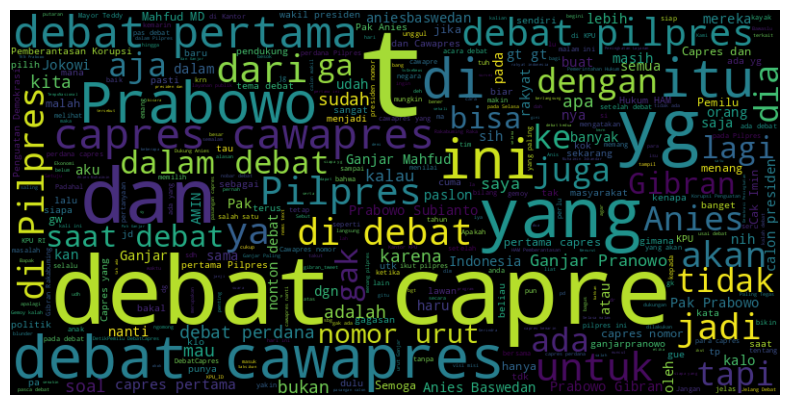

In [ ]:
# Asumsi data adalah DataFrame dan 'full_text' adalah kolom yang berisi data teks
df = ' '.join(debat['full_text'].tolist())  # Pastikan df terdefinisi dan dimuat dengan benar

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])  # Sesuaikan stopwords sesuai kebutuhan

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(df)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Koreksi typo dari "0ff" menjadi "off"
plt.show()

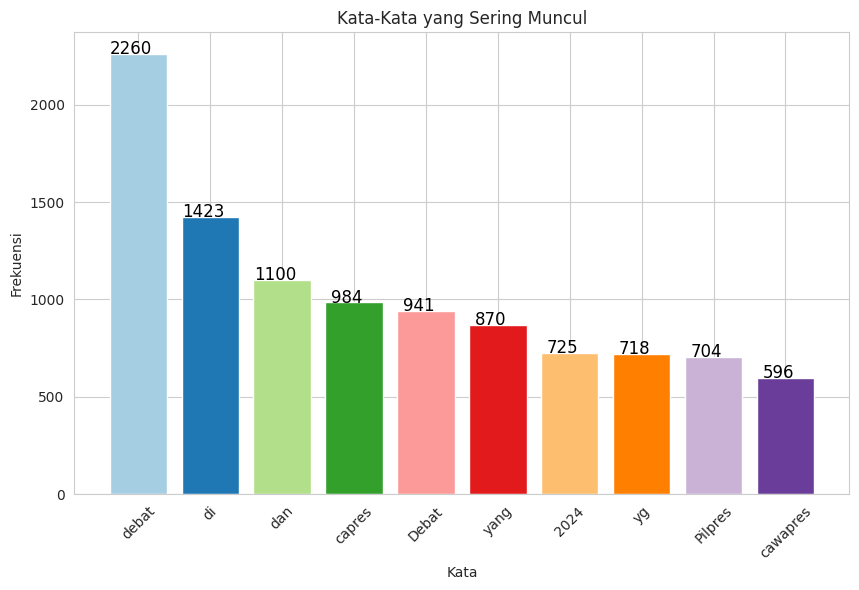

In [ ]:
# Membaca data
text = " ".join(debat["full_text"])
tokens = text.split()
word_counts = Counter(tokens)

# Mengambil 10 kata paling umum
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Mengatur warna
colors = plt.cm.Paired(range(len(word)))

# Membuat plot
plt.figure(figsize=(10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Kata-Kata yang Sering Muncul")
plt.xticks(rotation=45)

# Menambahkan teks di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

In [ ]:
#@title Read to Data (Full_text)
df = pd.DataFrame(debat[['full_text']])
df.head(100)

,full_text
0,Selain debat capres cawapres sebenernya perlu ...
1,Anakku Gen-Z mengira debat capres kemarin adal...
2,@grumpycatto_ Anjay serasa debat capres wkwkwk
3,Gimana sih kesan warganet terhadap debat capre...
4,Calon wakil presiden (cawapres) nomor urut 1 M...
...,...
95,Apakah Benar Buya Yahya Yang ada di Panggung D...
96,@Adnanad75579946 @NataprajaSule @psi_id Mas Ke...
97,Alhamdulillah Maa syaa Allah Elektabilitas #AM...
98,@lesmana_sofyan @M45Broo 01 memang jago debat ...


##### Cleaning data teks

In [ ]:
def remove_URL(tweet):
    # Memperbarui regex untuk mengidentifikasi dan menghapus semua URL secara benar
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_emoji(tweet):
    # Kompilasi pola untuk mengidentifikasi dan menghapus emoji
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emotikon
                               u"\U0001F300-\U0001F5FF"  # Simbol & Piktogram
                               u"\U0001F680-\U0001F6FF"  # Simbol Transportasi & Peta
                               u"\U0001F1E0-\U0001F1FF"  # Bendera (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka_username(tweet):
    # Terapkan penghapusan nama pengguna dan tagar sebelum menghapus semua karakter non-alfanumerik
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # Menghapus sebutan
    tweet = re.sub(r'#\w+', '', tweet)  # Menghapus tagar
    tweet = re.sub(r'RT[\s]+', '', tweet)  # Menghapus retweet
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)  # Menghapus URL lagi jika belum tertangkap
    tweet = re.sub('[0-9]+', '', tweet)  # Menghapus angka
    tweet = re.sub(r'\$\w*', '', tweet)  # Menghapus simbol mata uang dan sejenisnya
    tweet = re.sub(r'[^A-Za-z0-9 ]', '', tweet)  # Menghapus semua karakter non-alfanumerik
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Menghapus spasi ekstra
    return tweet

def remove_punct(tweets):
    # Menerjemahkan dan menghapus semua tanda baca dari teks
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

# Asumsi 'df' adalah dataframe yang sudah didefinisikan
df['cleansing'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_angka_username(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_punct(x))

df.head(100)

,full_text,cleansing
0,Selain debat capres cawapres sebenernya perlu ...,Selain debat capres cawapres sebenernya perlu ...
1,Anakku Gen-Z mengira debat capres kemarin adal...,Anakku GenZ mengira debat capres kemarin adala...
2,@grumpycatto_ Anjay serasa debat capres wkwkwk,Anjay serasa debat capres wkwkwk
3,Gimana sih kesan warganet terhadap debat capre...,Gimana sih kesan warganet terhadap debat capre...
4,Calon wakil presiden (cawapres) nomor urut 1 M...,Calon wakil presiden cawapres nomor urut Muhai...
...,...,...
95,Apakah Benar Buya Yahya Yang ada di Panggung D...,Apakah Benar Buya Yahya Yang ada di Panggung D...
96,@Adnanad75579946 @NataprajaSule @psi_id Mas Ke...,Mas Ketum ini di samping tdk mengerti gagasan ...
97,Alhamdulillah Maa syaa Allah Elektabilitas #AM...,Alhamdulillah Maa syaa Allah Elektabilitas mak...
98,@lesmana_sofyan @M45Broo 01 memang jago debat ...,memang jago debat tapi sayang kinerja nya nol ...


##### a. Case Folding & Tokenization

In [ ]:
df['Tokenization and Case Folding'] = df['cleansing'].apply(lambda x: x.lower().split())
df.head(100)

,full_text,cleansing,Tokenization and Case Folding
0,Selain debat capres cawapres sebenernya perlu ...,Selain debat capres cawapres sebenernya perlu ...,"[selain, debat, capres, cawapres, sebenernya, ..."
1,Anakku Gen-Z mengira debat capres kemarin adal...,Anakku GenZ mengira debat capres kemarin adala...,"[anakku, genz, mengira, debat, capres, kemarin..."
2,@grumpycatto_ Anjay serasa debat capres wkwkwk,Anjay serasa debat capres wkwkwk,"[anjay, serasa, debat, capres, wkwkwk]"
3,Gimana sih kesan warganet terhadap debat capre...,Gimana sih kesan warganet terhadap debat capre...,"[gimana, sih, kesan, warganet, terhadap, debat..."
4,Calon wakil presiden (cawapres) nomor urut 1 M...,Calon wakil presiden cawapres nomor urut Muhai...,"[calon, wakil, presiden, cawapres, nomor, urut..."
...,...,...,...
95,Apakah Benar Buya Yahya Yang ada di Panggung D...,Apakah Benar Buya Yahya Yang ada di Panggung D...,"[apakah, benar, buya, yahya, yang, ada, di, pa..."
96,@Adnanad75579946 @NataprajaSule @psi_id Mas Ke...,Mas Ketum ini di samping tdk mengerti gagasan ...,"[mas, ketum, ini, di, samping, tdk, mengerti, ..."
97,Alhamdulillah Maa syaa Allah Elektabilitas #AM...,Alhamdulillah Maa syaa Allah Elektabilitas mak...,"[alhamdulillah, maa, syaa, allah, elektabilita..."
98,@lesmana_sofyan @M45Broo 01 memang jago debat ...,memang jago debat tapi sayang kinerja nya nol ...,"[memang, jago, debat, tapi, sayang, kinerja, n..."


##### b. Filtering atau Stopword Removal

In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Filtering/stopwords removal'] = df['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))
df.head(100)

,full_text,cleansing,Tokenization and Case Folding,Filtering/stopwords removal
0,Selain debat capres cawapres sebenernya perlu ...,Selain debat capres cawapres sebenernya perlu ...,"[selain, debat, capres, cawapres, sebenernya, ...","[debat, capres, cawapres, sebenernya, jg, deba..."
1,Anakku Gen-Z mengira debat capres kemarin adal...,Anakku GenZ mengira debat capres kemarin adala...,"[anakku, genz, mengira, debat, capres, kemarin...","[anakku, genz, debat, capres, kemarin, adu, ga..."
2,@grumpycatto_ Anjay serasa debat capres wkwkwk,Anjay serasa debat capres wkwkwk,"[anjay, serasa, debat, capres, wkwkwk]","[anjay, serasa, debat, capres, wkwkwk]"
3,Gimana sih kesan warganet terhadap debat capre...,Gimana sih kesan warganet terhadap debat capre...,"[gimana, sih, kesan, warganet, terhadap, debat...","[gimana, sih, kesan, warganet, debat, capres, ..."
4,Calon wakil presiden (cawapres) nomor urut 1 M...,Calon wakil presiden cawapres nomor urut Muhai...,"[calon, wakil, presiden, cawapres, nomor, urut...","[calon, wakil, presiden, cawapres, nomor, urut..."
...,...,...,...,...
95,Apakah Benar Buya Yahya Yang ada di Panggung D...,Apakah Benar Buya Yahya Yang ada di Panggung D...,"[apakah, benar, buya, yahya, yang, ada, di, pa...","[buya, yahya, panggung, debat, capres, dibaris..."
96,@Adnanad75579946 @NataprajaSule @psi_id Mas Ke...,Mas Ketum ini di samping tdk mengerti gagasan ...,"[mas, ketum, ini, di, samping, tdk, mengerti, ...","[mas, ketum, samping, tdk, mengerti, gagasan, ..."
97,Alhamdulillah Maa syaa Allah Elektabilitas #AM...,Alhamdulillah Maa syaa Allah Elektabilitas mak...,"[alhamdulillah, maa, syaa, allah, elektabilita...","[alhamdulillah, maa, syaa, allah, elektabilita..."
98,@lesmana_sofyan @M45Broo 01 memang jago debat ...,memang jago debat tapi sayang kinerja nya nol ...,"[memang, jago, debat, tapi, sayang, kinerja, n...","[jago, debat, sayang, kinerja, nya, nol, ga, b..."


##### c. Stemming Data

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Pastikan mengimpor StemmerFactory jika menggunakan Sastrawi

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['stemming_data'] = df['Filtering/stopwords removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(100)

In [ ]:
#@title drop data duplicates "stemming_data"

df.drop_duplicates(subset ="stemming_data", keep = 'first', inplace = True)
df.head(100)

,full_text,cleansing,Tokenization and Case Folding,Filtering/stopwords removal,stemming_data
0,Selain debat capres cawapres sebenernya perlu ...,Selain debat capres cawapres sebenernya perlu ...,"[selain, debat, capres, cawapres, sebenernya, ...","[debat, capres, cawapres, sebenernya, jg, deba...",debat capres cawapres sebenernya jg debat top ...
1,Anakku Gen-Z mengira debat capres kemarin adal...,Anakku GenZ mengira debat capres kemarin adala...,"[anakku, genz, mengira, debat, capres, kemarin...","[anakku, genz, debat, capres, kemarin, adu, ga...",anak genz debat capres kemarin adu gagas progr...
2,@grumpycatto_ Anjay serasa debat capres wkwkwk,Anjay serasa debat capres wkwkwk,"[anjay, serasa, debat, capres, wkwkwk]","[anjay, serasa, debat, capres, wkwkwk]",anjay serasa debat capres wkwkwk
3,Gimana sih kesan warganet terhadap debat capre...,Gimana sih kesan warganet terhadap debat capre...,"[gimana, sih, kesan, warganet, terhadap, debat...","[gimana, sih, kesan, warganet, debat, capres, ...",gimana sih kesan warganet debat capres sistem ...
4,Calon wakil presiden (cawapres) nomor urut 1 M...,Calon wakil presiden cawapres nomor urut Muhai...,"[calon, wakil, presiden, cawapres, nomor, urut...","[calon, wakil, presiden, cawapres, nomor, urut...",calon wakil presiden cawapres nomor urut muhai...
...,...,...,...,...,...
95,Apakah Benar Buya Yahya Yang ada di Panggung D...,Apakah Benar Buya Yahya Yang ada di Panggung D...,"[apakah, benar, buya, yahya, yang, ada, di, pa...","[buya, yahya, panggung, debat, capres, dibaris...",buya yahya panggung debat capres baris mohon s...
96,@Adnanad75579946 @NataprajaSule @psi_id Mas Ke...,Mas Ketum ini di samping tdk mengerti gagasan ...,"[mas, ketum, ini, di, samping, tdk, mengerti, ...","[mas, ketum, samping, tdk, mengerti, gagasan, ...",mas tum samping tdk erti gagas yg ganjar debat...
97,Alhamdulillah Maa syaa Allah Elektabilitas #AM...,Alhamdulillah Maa syaa Allah Elektabilitas mak...,"[alhamdulillah, maa, syaa, allah, elektabilita...","[alhamdulillah, maa, syaa, allah, elektabilita...",alhamdulillah maa syaa allah elektabilitas kua...
98,@lesmana_sofyan @M45Broo 01 memang jago debat ...,memang jago debat tapi sayang kinerja nya nol ...,"[memang, jago, debat, tapi, sayang, kinerja, n...","[jago, debat, sayang, kinerja, nya, nol, ga, b...",jago debat sayang kerja nya nol ga butuh org y...


In [ ]:
#@title save dataset hasil pre-processing data NLP
df.to_csv('/content/drive/MyDrive/data/Debat 1/Data NLP/debat1_Hasil_Preprocessing_NLP.csv', encoding='utf8', index=False)


In [ ]:
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data NLP/debat1_Hasil_Preprocessing_NLP.csv'

data = pd.read_csv(path_to_csv)
data.head(2)

,full_text,cleansing,Tokenization and Case Folding,Filtering/stopwords removal,stemming_data
0,Selain debat capres cawapres sebenernya perlu ...,Selain debat capres cawapres sebenernya perlu ...,"['selain', 'debat', 'capres', 'cawapres', 'seb...","['debat', 'capres', 'cawapres', 'sebenernya', ...",debat capres cawapres sebenernya jg debat top ...
1,Anakku Gen-Z mengira debat capres kemarin adal...,Anakku GenZ mengira debat capres kemarin adala...,"['anakku', 'genz', 'mengira', 'debat', 'capres...","['anakku', 'genz', 'debat', 'capres', 'kemarin...",anak genz debat capres kemarin adu gagas progr...


In [ ]:
#@title export frekuensi kata
import pandas as pd

text = " ".join(data["stemming_data"])
tokens = text.split()

# menghitung frekuensi kemunculan setiap kata
word_counts = Counter(tokens)

# mengambil kata dengan frekuensi kemunculan tertinggi
top_words = word_counts.most_common()

word, count = zip(*top_words)
data = pd.DataFrame({'Word': word, 'Count': count})

data.to_csv('/content/drive/MyDrive/data/Debat 1/Data Kamus/word_frequency.csv', index=False)

##### d. Normalisasi

In [ ]:
#@title Read to Dataset
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data NLP/debat1_Hasil_Preprocessing_NLP.csv'

data = pd.read_csv(path_to_csv)
data.head(2)

,full_text,cleansing,Tokenization and Case Folding,Filtering/stopwords removal,stemming_data
0,Selain debat capres cawapres sebenernya perlu ...,Selain debat capres cawapres sebenernya perlu ...,"['selain', 'debat', 'capres', 'cawapres', 'seb...","['debat', 'capres', 'cawapres', 'sebenernya', ...",debat capres cawapres sebenernya jg debat top ...
1,Anakku Gen-Z mengira debat capres kemarin adal...,Anakku GenZ mengira debat capres kemarin adala...,"['anakku', 'genz', 'mengira', 'debat', 'capres...","['anakku', 'genz', 'debat', 'capres', 'kemarin...",anak genz debat capres kemarin adu gagas progr...


###### Read to Dataset (Kamus)

In [ ]:
# Read Dataset
data = pd.read_csv("/content/drive/MyDrive/data/Debat 1/Data NLP/debat1_Hasil_Preprocessing_NLP.csv")
dataset1 = pd.DataFrame(data['stemming_data'])
print("=====DATASET-1=====")
dataset1.info()
print("")

dataset2 = pd.read_excel("/content/drive/MyDrive/data/Debat 1/Data Kamus/kamus.xlsx")
print("=====DATASET-2=====")
dataset2.info()

=====DATASET-1=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stemming_data  3136 non-null   object
dtypes: object(1)
memory usage: 24.6+ KB

=====DATASET-2=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6933 entries, 0 to 6932
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kata             6931 non-null   object
 1   Kata_Baku        6792 non-null   object
 2   Kata_Tidak_Baku  1601 non-null   object
dtypes: object(3)
memory usage: 162.6+ KB


###### a. Identifikasi kata_tidak_baku dan kata_baku

In [ ]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
	if isinstance(text, str):
		words = text.split()
		replaced_words = []
		kalimat_baku = []
		kata_diganti = []
		kata_tidak_baku_hash = []

		for word in words:
			if word in kamus_tidak_baku:
				baku_word = kamus_tidak_baku[word]
				if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
					replaced_words.apprend(baku_word)
					kalimat_baku.append(baku_word)
					kata_diganti.append(word)
					kata_tidak_baku_hash.apprend(hash(word))
				else:
					replaced_words.append('<karakter eksplisit>')
					kalimat_baku.append(word)
			else:
				replaced_words.append(word)
		replaced_text = ' '.join(replaced_words)
	else:
		replaced_text = ''
		kalimat_baku = []
		kata_diganti = []
		kata_tidak_baku_hash = []

	return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash


In [ ]:
# Read Dataset
data = pd.read_csv("/content/drive/MyDrive/data/Debat 1/Data NLP/debat1_Hasil_Preprocessing_NLP.csv")
df_dataset1 = pd.DataFrame(data['stemming_data'])

# Read kamus kata tidak baku
kamus_data = pd.read_excel("/content/drive/MyDrive/data/Debat 1/Data Kamus/kamus.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['Kata_Tidak_Baku'], kamus_data['Kata_Baku']))

In [ ]:
# # Terapkan fungsi penggantian kata tidak baku
# Definisikan fungsi untuk menggantikan kata tidak baku
def ganti_kata_tidak_baku(teks, kamus_tidak_baku):
    kata_diganti = []
    kalimat_baku = []
    kata_tidak_baku = []

    for kata in teks.split():
        if kata in kamus_tidak_baku:
            kata_baku = kamus_tidak_baku[kata]
            if isinstance(kata_baku, str) and all(char.isalpha() for char in kata_baku):
                kata_diganti.append(kata_baku)
                kalimat_baku.append(kata_baku)
                kata_tidak_baku.append(kata)
            else:
                kata_diganti.append(kata)
        else:
            kata_diganti.append(kata)

    return ' '.join(kata_diganti), ' '.join(kalimat_baku), ' '.join(kata_tidak_baku), hash(' '.join(kata_diganti))

# Terapkan fungsi penggantian kata tidak baku
df_dataset1['normalisasi'], df_dataset1['Kata_Baku'], df_dataset1['Kata_Tidak_Baku'], df_dataset1['Kata_Tidak_Baku_Hash'] = zip(*df_dataset1['stemming_data'].apply(lambda x: ganti_kata_tidak_baku(x, kamus_tidak_baku)))


In [ ]:
# tampilkan hasil
df_dataset1.head()


,stemming_data,normalisasi,Kata_Baku,Kata_Tidak_Baku,Kata_Tidak_Baku_Hash
0,debat capres cawapres sebenernya jg debat top ...,debat capres cawapres sebenernya juga debat to...,juga saja ini ini saja,jg aja the the aja,2385214247406342338
1,anak genz debat capres kemarin adu gagas progr...,anak genz debat capres kemarin adu gagas progr...,,,3242641538716590122
2,anjay serasa debat capres wkwkwk,anjay serasa debat capres hahaha,hahaha,wkwkwk,-5187452562876442964
3,gimana sih kesan warganet debat capres sistem ...,gimana sih kesan warganet debat capres sistem ...,,,2061152255115323283
4,calon wakil presiden cawapres nomor urut muhai...,calon wakil presiden cawapres nomor urut muhai...,,,-5051193866380580353


In [ ]:
data = pd.DataFrame(df_dataset1[['stemming_data','Kata_Tidak_Baku','Kata_Baku','normalisasi']])
data.head(10)

,stemming_data,Kata_Tidak_Baku,Kata_Baku,normalisasi
0,debat capres cawapres sebenernya jg debat top ...,jg aja the the aja,juga saja ini ini saja,debat capres cawapres sebenernya juga debat to...
1,anak genz debat capres kemarin adu gagas progr...,,,anak genz debat capres kemarin adu gagas progr...
2,anjay serasa debat capres wkwkwk,wkwkwk,hahaha,anjay serasa debat capres hahaha
3,gimana sih kesan warganet debat capres sistem ...,,,gimana sih kesan warganet debat capres sistem ...
4,calon wakil presiden cawapres nomor urut muhai...,,,calon wakil presiden cawapres nomor urut muhai...
5,tarik debat komika capres no wakil bang abdur ...,no bang no no yg,nomor kakak nomor nomor yang,tarik debat komika capres nomor wakil kakak ab...
6,emg gitu nyata nya udacoba cek deh pas debat c...,emg jg aamiin jg tsb,emang juga amiin juga tersebut,emang gitu nyata nya udacoba cek deh pas debat...
7,moga kenan hadir debat capres bentuk dukung efek,moga,semoga,semoga kenan hadir debat capres bentuk dukung ...
8,acara debat capres acara menhan,,,acara debat capres acara menhan
9,semua capres debat kemarin pake alat tsb tahu ...,tsb gak sorry yeehny rp aja tau sy klo gak sy,tersebut tidak maaf yeh rupiah saja tahu saya ...,semua capres debat kemarin pake alat tersebut ...


In [ ]:
jumlah_kata_diperbaiki = df_dataset1['Kata_Baku'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0).sum()

print("Jumlah Kata Yang Sudah Diperbaiki:", jumlah_kata_diperbaiki)


Jumlah Kata Yang Sudah Diperbaiki: 5487


####Visualisasi Word Cloud (Frekuensi Kata)

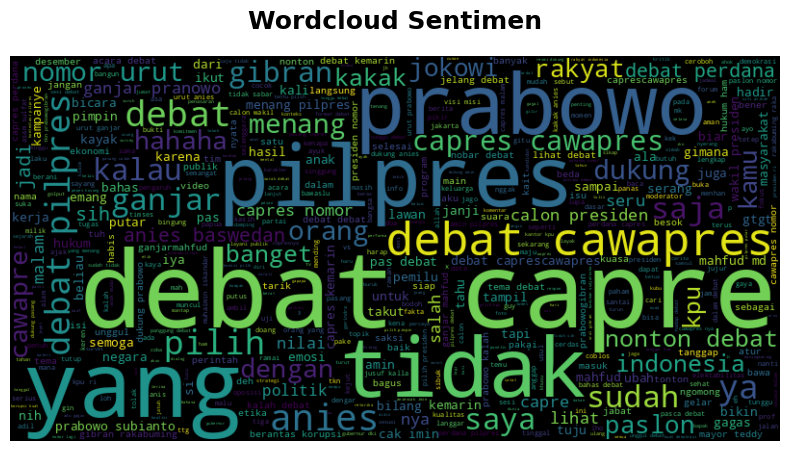

In [ ]:
# Assuming data is a DataFrame and 'full_text' is a column containing text data
df = ' '.join(df_dataset1['normalisasi'].tolist())  # Ensure df is defined and properly loaded

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])  # Customize stopwords as needed

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(df)

plt.figure(figsize=(10, 5))
plt.title("Wordcloud Sentimen", fontsize=18, fontweight='bold', pad=20)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Correct typo from "0ff" to "off"
plt.show()

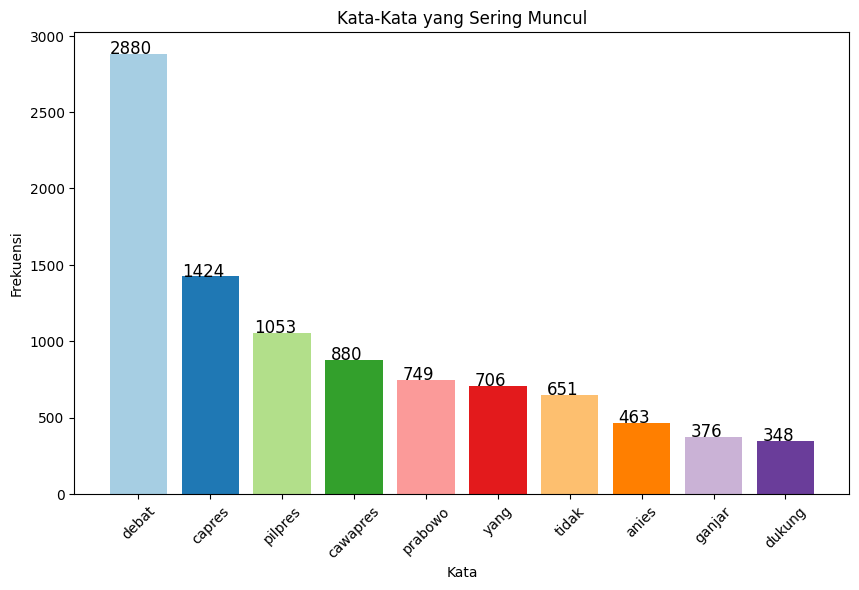

In [ ]:
# Membaca data
text = " ".join(df_dataset1["normalisasi"])
tokens = text.split()
word_counts = Counter(tokens)

# Mengambil 10 kata paling umum
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Mengatur warna
colors = plt.cm.Paired(range(len(word)))

# Membuat plot
plt.figure(figsize=(10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Kata-Kata yang Sering Muncul")
plt.xticks(rotation=45)

# Menambahkan teks di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

In [ ]:
data.to_csv('/content/drive/MyDrive/data/Debat 1/Data NLP/debat1_pre-processing_normalisasi.csv', index=False)

##### e. Translate

In [ ]:
#@title Read to Dataset
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data NLP/debat1_pre-processing_normalisasi.csv'

df = pd.read_csv(path_to_csv)
df.head(2)

,stemming_data,Kata_Tidak_Baku,Kata_Baku,normalisasi
0,debat capres cawapres sebenernya jg debat top ...,jg aja the the aja,juga saja ini ini saja,debat capres cawapres sebenernya juga debat to...
1,anak genz debat capres kemarin adu gagas progr...,NaN,NaN,anak genz debat capres kemarin adu gagas progr...


In [ ]:
def terjemahkan_teks(teks, bahasa_tujuan='en'):
    try:
        terjemahan = GoogleTranslator(source='auto', target=bahasa_tujuan).translate(teks)
        return terjemahan
    except Exception as e:
        print(f"Terjadi kesalahan saat menerjemahkan teks: {e}")
        return teks  # Mengembalikan teks asli jika terjadi kesalahan

data_terjemahan = []
for indeks, baris in df.iterrows():
    teks_terjemahan = terjemahkan_teks(baris['normalisasi'])
    data_terjemahan.append(teks_terjemahan)

df['teks'] = data_terjemahan

In [ ]:
df.head()

,stemming_data,Kata_Tidak_Baku,Kata_Baku,normalisasi,teks
0,debat capres cawapres sebenernya jg debat top ...,jg aja the the aja,juga saja ini ini saja,debat capres cawapres sebenernya juga debat to...,the presidential and vice presidential candida...
1,anak genz debat capres kemarin adu gagas progr...,NaN,NaN,anak genz debat capres kemarin adu gagas progr...,Genz's children debated the presidential candi...
2,anjay serasa debat capres wkwkwk,wkwkwk,hahaha,anjay serasa debat capres hahaha,Anjay feels like a presidential candidate deba...
3,gimana sih kesan warganet debat capres sistem ...,NaN,NaN,gimana sih kesan warganet debat capres sistem ...,What are netizens' impressions of the presiden...
4,calon wakil presiden cawapres nomor urut muhai...,NaN,NaN,calon wakil presiden cawapres nomor urut muhai...,"vice presidential candidate, vice presidential..."


In [ ]:
df.to_csv('/content/drive/MyDrive/data/Debat 1/Data NLP/Debat1-NLP.csv',encoding='utf8',index=False)

### Data Preprocessing Labelling Lexicon Based

In [ ]:
#@title Read to Data
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data NLP/Debat1-NLP.csv'

data= pd.read_csv(path_to_csv)
data.head(2)

,stemming_data,Kata_Tidak_Baku,Kata_Baku,normalisasi,teks
0,debat capres cawapres sebenernya jg debat top ...,jg aja the the aja,juga saja ini ini saja,debat capres cawapres sebenernya juga debat to...,the presidential and vice presidential candida...
1,anak genz debat capres kemarin adu gagas progr...,NaN,NaN,anak genz debat capres kemarin adu gagas progr...,Genz's children debated the presidential candi...


In [ ]:
df = pd.DataFrame(data['teks'])
df.head(10)

,teks
0,the presidential and vice presidential candida...
1,Genz's children debated the presidential candi...
2,Anjay feels like a presidential candidate deba...
3,What are netizens' impressions of the presiden...
4,"vice presidential candidate, vice presidential..."
5,Pull debate comic for presidential candidate n...
6,"It's true, you tried to check it when you deba..."
7,I hope you can attend the presidential debate ...
8,Minister of Defense's Presidential Candidate D...
9,all the presidential candidates for the debate...


#### a. Labelling (Sentimen Positif, Negatif, Netral)

In [ ]:
data = SentimentIntensityAnalyzer()

labels = []
scores = []

# Asumsi bahwa df sudah didefinisikan dan memiliki kolom 'teks'
# Memastikan semua entri di 'teks' adalah string dan menangani NaN
df['teks'] = df['teks'].astype(str)

for text in df['teks']:
    # Memastikan teks adalah string dan bukan NaN
    if text and not pd.isna(text):
        sentiment_scores = data.polarity_scores(text)  # Menghitung skor sentimen
        compound_score = sentiment_scores['compound']  # Mengambil skor compound
    else:
        compound_score = 0  # Jika NaN atau kosong, tentukan skor netral

    scores.append(compound_score)  # Menambahkan skor ke dalam daftar scores

    # Menentukan label berdasarkan skor compound
    if compound_score > 0:
        label = 'positif'
    elif compound_score < 0:
        label = 'negatif'
    else:
        label = 'netral'

    labels.append(label)  # Menambahkan label ke dalam daftar labels

# Menambahkan skor dan label ke DataFrame
df['sentiment_score'] = scores
df['sentiment'] = labels

# Memilih kolom yang diinginkan untuk ditampilkan
selected_columns = ['teks', 'sentiment_score', 'sentiment']
data = df[selected_columns]

# Menampilkan 10 baris pertama
data.head(10)

,teks,sentiment_score,sentiment
0,the presidential and vice presidential candida...,0.5267,positif
1,Genz's children debated the presidential candi...,0.4939,positif
2,Anjay feels like a presidential candidate deba...,0.7269,positif
3,What are netizens' impressions of the presiden...,0.2263,positif
4,"vice presidential candidate, vice presidential...",0.8519,positif
5,Pull debate comic for presidential candidate n...,0.7184,positif
6,"It's true, you tried to check it when you deba...",0.7783,positif
7,I hope you can attend the presidential debate ...,0.6808,positif
8,Minister of Defense's Presidential Candidate D...,0.0000,netral
9,all the presidential candidates for the debate...,0.6012,positif


<ipython-input-12-f96e4f22ecbb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


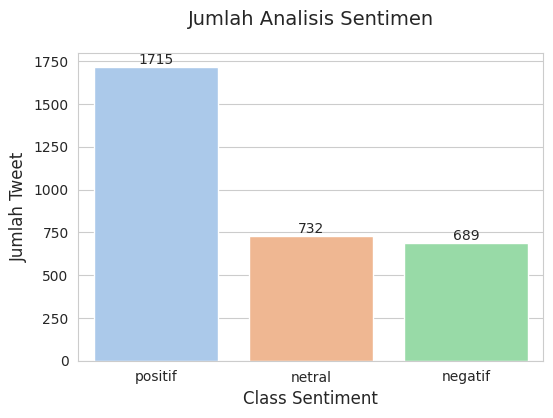

In [ ]:
sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment',  fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
df.to_csv('Labelling_Debat.csv', encoding='utf8', index=False)

#### b. Labelling (Paslon 1,2,,3)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/Debat 1/Labelling_Debat.csv')

data.head(10)

,teks,sentiment_score,sentiment
0,the presidential and vice presidential candida...,0.5267,positif
1,Genz's children debated the presidential candi...,0.4939,positif
2,Anjay feels like a presidential candidate deba...,0.7269,positif
3,What are netizens' impressions of the presiden...,0.2263,positif
4,"vice presidential candidate, vice presidential...",0.8519,positif
5,Pull debate comic for presidential candidate n...,0.7184,positif
6,"It's true, you tried to check it when you deba...",0.7783,positif
7,I hope you can attend the presidential debate ...,0.6808,positif
8,Minister of Defense's Presidential Candidate D...,0.0000,netral
9,all the presidential candidates for the debate...,0.6012,positif


In [ ]:
data.shape

(3136, 3)

In [ ]:
data = SentimentIntensityAnalyzer()

# Memuat data dari file CSV
df = pd.read_csv('/content/drive/MyDrive/data/Debat 1/Labelling_Debat.csv')

# Pastikan kolom 'teks' adalah string dan bukan NaN
df['teks'] = df['teks'].fillna('').astype(str)

# Kata kunci untuk setiap paslon
keywords = {
    'Paslon 1': ['anies', 'anis', 'baswedan', 'anies baswedan', 'cak', 'cak imin', 'muhaimin', 'muhaimin iskandar'],
    'Paslon 2': ['prabowo subianto', 'prabowo', 'subianto', 'bowo', 'gibran', 'rakabuming', 'raka', 'gibran rakabuming raka'],
    'Paslon 3': ['ganjar', 'pranowo', 'ganjar pranowo', 'mahfud', 'mahfud md', 'md']
}

# Fungsi untuk mengidentifikasi paslon berdasarkan kata kunci
def identify_paslon(text):
    for paslon, keys in keywords.items():
        if any(key in text for key in keys):
            return paslon
    return 'None'

# Menambahkan kolom 'Paslon' ke DataFrame berdasarkan kata kunci
df['Paslon'] = df['teks'].apply(identify_paslon)

scores = []
labels = []

# Menghitung skor sentimen dan menentukan label
for text in df['teks']:
    sentiment_scores = data.polarity_scores(text)  # Menghitung skor sentimen
    compound_score = sentiment_scores['compound']  # Mengambil skor compound
    scores.append(compound_score)  # Menambahkan skor ke dalam daftar scores

    # Menentukan label berdasarkan skor compound
    if compound_score > 0:
        label = 'positif'
    elif compound_score < 0:
        label = 'negatif'
    else:
        label = 'netral'
    labels.append(label)  # Menambahkan label ke dalam daftar labels

# Menambahkan skor dan label ke DataFrame
df['sentiment_score'] = scores
df['sentiment'] = labels

# Aggregating the results by Paslon and sentiment
result = df.groupby(['Paslon', 'sentiment']).size().unstack(fill_value=0)

# Menampilkan hasil
print(result)

# Menyimpan DataFrame ke file CSV baru
df.to_csv('/content/drive/MyDrive/data/Debat 1/Labelling_Debat_Paslon.csv', encoding='utf8', index=False)


sentiment  negatif  netral  positif
Paslon                             
None           471     609     1212
Paslon 1        22      13       94
Paslon 2       183      96      326
Paslon 3        13      14       83


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/Debat 1/Labelling_Debat_Paslon.csv')

data.head(10)

,teks,sentiment_score,sentiment,Paslon
0,the presidential and vice presidential candida...,0.5267,positif,NaN
1,Genz's children debated the presidential candi...,0.4939,positif,Paslon 2
2,Anjay feels like a presidential candidate deba...,0.7269,positif,NaN
3,What are netizens' impressions of the presiden...,0.2263,positif,NaN
4,"vice presidential candidate, vice presidential...",0.8519,positif,NaN
5,Pull debate comic for presidential candidate n...,0.7184,positif,NaN
6,"It's true, you tried to check it when you deba...",0.7783,positif,NaN
7,I hope you can attend the presidential debate ...,0.6808,positif,NaN
8,Minister of Defense's Presidential Candidate D...,0.0000,netral,NaN
9,all the presidential candidates for the debate...,0.6012,positif,NaN


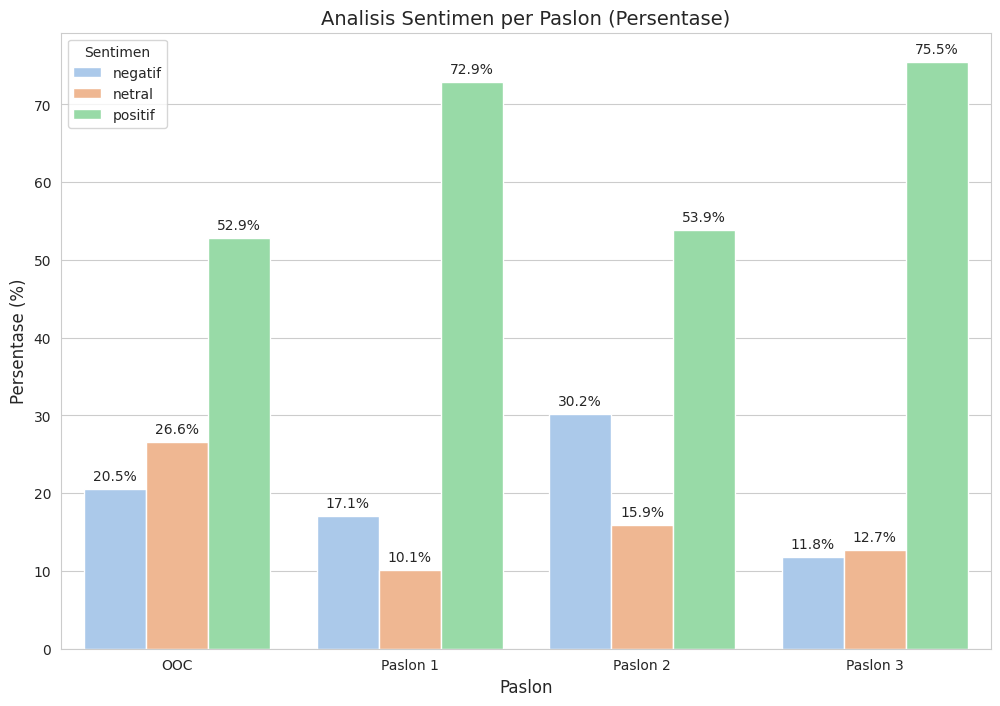

In [ ]:
# Memuat data dari file CSV
data_path = '/content/drive/MyDrive/data/Debat 1/Labelling_Debat_Paslon.csv'
df = pd.read_csv(data_path)

# Menambahkan kolom 'count' yang berisi jumlah kemunculan
df['count'] = 1

# Mengganti nilai 'NaN' sebagai kategori 'Paslon' jika tidak ada nilai
df['Paslon'] = df['Paslon'].fillna('OOC')

# Membuat pivot table untuk mendapatkan jumlah per sentimen dan Paslon
pivot_df = df.pivot_table(index='Paslon', columns='sentiment', values='count', aggfunc='sum').fillna(0)

# Menghitung total per Paslon untuk normalisasi
pivot_df['total'] = pivot_df.sum(axis=1)
for column in pivot_df.columns[:-1]:  # Skip 'total' column
    pivot_df[column] = (pivot_df[column] / pivot_df['total']) * 100

# Membuat plot untuk semua Paslon termasuk NaN
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=pivot_df.reset_index().melt(id_vars=['Paslon'], value_vars=pivot_df.columns[:-1], var_name='sentiment', value_name='percentage'),
                      x='Paslon', y='percentage', hue='sentiment', palette='pastel')

# Menambahkan judul dan label
plt.title('Analisis Sentimen per Paslon (Persentase)', fontsize=14)
plt.xlabel('Paslon', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)

# Menampilkan nilai persentase pada setiap bar hanya jika lebih dari 0%
for p in barplot.patches:
    if p.get_height() > 0:  # Hanya menampilkan label jika lebih dari 0%
        barplot.annotate(f'{p.get_height():.1f}%',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 9),
                         textcoords='offset points')

plt.legend(title='Sentimen')
plt.show()

---
## **Modelling**
---


### Model Prediction


In [ ]:
#@title Read to Data Model
data = pd.read_csv('/content/drive/MyDrive/data/Debat 1/Labelling_Debat_Paslon.csv')

data.head(10)

### 1) Researh Model Random Forest dan SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Memisahkan data menjadi data latih 70 % dan data uji 30%
X_train, X_test, y_train, y_test = train_test_split(data['teks'], data['sentiment'], test_size=0.30, random_state=42)

# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Inisialisasi model
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model SVM
svm_model.fit(X_train_vec, y_train)
svm_train_pred = svm_model.predict(X_train_vec)
svm_test_pred = svm_model.predict(X_test_vec)

# Training model Random Forest
rf_model.fit(X_train_vec, y_train)
rf_train_pred = rf_model.predict(X_train_vec)
rf_test_pred = rf_model.predict(X_test_vec)

# Evaluasi model
print("SVM Training Accuracy:", accuracy_score(y_train, svm_train_pred))
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_pred))
print("Random Forest Training Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_test_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_test_pred))

SVM Training Accuracy: 0.9977220956719818
SVM Test Accuracy: 0.6971307120085016
Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.6758767268862912

SVM Classification Report:
              precision    recall  f1-score   support

     negatif       0.51      0.53      0.52       205
      netral       0.62      0.77      0.69       209
     positif       0.82      0.73      0.77       527

    accuracy                           0.70       941
   macro avg       0.65      0.68      0.66       941
weighted avg       0.71      0.70      0.70       941


Random Forest Classification Report:
              precision    recall  f1-score   support

     negatif       0.89      0.12      0.21       205
      netral       0.62      0.69      0.65       209
     positif       0.69      0.89      0.77       527

    accuracy                           0.68       941
   macro avg       0.73      0.56      0.54       941
weighted avg       0.72      0.68      0.62       941



### 2) Research Model Logistic Regression, KNN, dan Bernoulli Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Memisahkan data menjadi data latih 70% dan data uji 30%
X_train, X_test, y_train, y_test = train_test_split(data['teks'], data['sentiment'], test_size=0.30, random_state=42)

# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Reduksi dimensi dengan PCA (opsional, coba untuk meningkatkan performa KNN)
pca = PCA(n_components=100)  # Sesuaikan n_components sesuai kebutuhan
X_train_pca = pca.fit_transform(X_train_vec.toarray())
X_test_pca = pca.transform(X_test_vec.toarray())

# Inisialisasi model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)  # Tingkatkan max_iter
knn_model = KNeighborsClassifier(n_neighbors=10)  # Sesuaikan n_neighbors
bernoulli_model = BernoulliNB()

# Training model Logistic Regression
logreg_model.fit(X_train_vec, y_train)
logreg_train_pred = logreg_model.predict(X_train_vec)
logreg_test_pred = logreg_model.predict(X_test_vec)

# Training model K-Nearest Neighbors pada data PCA
knn_model.fit(X_train_pca, y_train)
knn_train_pred = knn_model.predict(X_train_pca)
knn_test_pred = knn_model.predict(X_test_pca)

# Training model Bernoulli Naive Bayes
bernoulli_model.fit(X_train_vec, y_train)
bernoulli_train_pred = bernoulli_model.predict(X_train_vec)
bernoulli_test_pred = bernoulli_model.predict(X_test_vec)

# Evaluasi model
print("Logistic Regression Training Accuracy:", accuracy_score(y_train, logreg_train_pred))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, logreg_test_pred))
print("KNN Training Accuracy:", accuracy_score(y_train, knn_train_pred))
print("KNN Test Accuracy:", accuracy_score(y_test, knn_test_pred))
print("Bernoulli Naive Bayes Training Accuracy:", accuracy_score(y_train, bernoulli_train_pred))
print("Bernoulli Naive Bayes Test Accuracy:", accuracy_score(y_test, bernoulli_test_pred))

# Laporan klasifikasi untuk detail lebih lanjut
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_test_pred))
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_test_pred))
print("\nBernoulli Naive Bayes Classification Report:")
print(classification_report(y_test, bernoulli_test_pred))

Logistic Regression Training Accuracy: 0.9913439635535307
Logistic Regression Test Accuracy: 0.7130712008501594
KNN Training Accuracy: 0.5927107061503417
KNN Test Accuracy: 0.4314558979808714
Bernoulli Naive Bayes Training Accuracy: 0.8296127562642369
Bernoulli Naive Bayes Test Accuracy: 0.6663124335812965

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     negatif       0.58      0.48      0.53       205
      netral       0.64      0.75      0.69       209
     positif       0.79      0.79      0.79       527

    accuracy                           0.71       941
   macro avg       0.67      0.67      0.67       941
weighted avg       0.71      0.71      0.71       941


KNN Classification Report:
              precision    recall  f1-score   support

     negatif       0.33      0.13      0.19       205
      netral       0.32      0.81      0.46       209
     positif       0.65      0.40      0.49       527

    accuracy         

Berdasarkan hasil evaluasi model, berikut analisis mengenai model Logistic Regression, KNN (K-Nearest Neighbors), Bernoulli Naive Bayes, SVM (Support Vector Machine), dan Random Forest dalam konteks underfitting, overfitting, dan efektivitas mereka untuk klasifikasi sentimen (negatif, positif, netral):

1. **Logistic Regression**
   - **Training Accuracy**: 0.9913
   - **Test Accuracy**: 0.7131

   **Analisis**:
   - Logistic Regression menunjukkan tanda-tanda overfitting dengan akurasi pelatihan yang sangat tinggi dibandingkan dengan akurasi pengujian yang lebih rendah. Ini mengindikasikan bahwa model mungkin terlalu spesifik untuk data pelatihan.
   - Model ini efektif untuk kelas 'positif' dengan f1-score 0.79, namun kurang efektif untuk kelas 'negatif'.

2. **KNN (K-Nearest Neighbors)**
   - **Training Accuracy**: 0.5927
   - **Test Accuracy**: 0.4315

   **Analisis**:
   - KNN menunjukkan underfitting yang signifikan, ditandai dengan akurasi yang rendah baik pada pelatihan maupun pengujian. Ini menunjukkan bahwa model tidak memadai untuk menangkap pola dalam data.
   - Model ini paling kurang efektif, terutama pada kelas 'negatif' dengan f1-score hanya 0.19.

3. **Bernoulli Naive Bayes**
   - **Training Accuracy**: 0.8296
   - **Test Accuracy**: 0.6663

   **Analisis**:
   - Bernoulli Naive Bayes menunjukkan keseimbangan yang lebih baik antara akurasi pelatihan dan pengujian. Meskipun ada indikasi overfitting, tingkatnya lebih moderat.
   - Model ini sangat efektif untuk kelas 'positif' dengan f1-score 0.77 dan juga cukup baik untuk kelas 'netral'.

4. **SVM (Support Vector Machine)**
   - **Training Accuracy**: 0.9977
   - **Test Accuracy**: 0.6971

   **Analisis**:
   - SVM menunjukkan overfitting yang kuat, dengan akurasi pelatihan yang hampir sempurna dan penurunan yang signifikan pada pengujian. Ini mengindikasikan model yang terlalu spesifik pada data pelatihan.
   - Meskipun demikian, SVM efektif untuk kelas 'positif', namun kurang pada kelas 'negatif'.

5. **Random Forest**
   - **Training Accuracy**: 1.0
   - **Test Accuracy**: 0.6759

   **Analisis**:
   - Random Forest juga menunjukkan overfitting yang signifikan, dengan akurasi pelatihan yang sempurna. Hal ini menunjukkan kecenderungan model untuk menyesuaikan terlalu spesifik pada data pelatihan.
   - Performa Random Forest lebih merata dibandingkan model lain, dengan skor yang baik pada kelas 'positif'.

**Rekomendasi Model Berdasarkan Kinerja**:
1. **Bernoulli Naive Bayes** - Model ini menunjukkan keseimbangan yang baik antara pelatihan dan pengujian, efektif untuk kelas 'positif' dan 'netral'.
2. **Random Forest** - Meskipun ada overfitting, performanya relatif baik secara keseluruhan.
3. **Logistic Regression** - Efektif untuk kelas 'positif' tetapi memerlukan penyesuaian untuk mengurangi overfitting.
4. **SVM** - Memerlukan penyesuaian signifikan untuk mengatasi overfitting, tetapi masih efektif untuk kelas 'positif'.
5. **KNN** - Membutuhkan perbaikan signifikan, menunjukkan underfitting yang kuat.

**Langkah Berikutnya**:
- **Tuning Hyperparameter**: Menggunakan grid search atau random search untuk menyesuaikan hyperparameter dan mengatasi overfitting, khususnya untuk model seperti SVM dan Random Forest.
- **Feature Engineering**: Memperkaya fitur yang digunakan bisa meningkatkan performa, khususnya pada model yang underfit seperti KNN.
- **Teknik Sampling**: Menimbang teknik resampling untuk mengatasi ketidakseimbangan dalam data dan meningkatkan performa model pada kelas minoritas.

---
### **Model Random Forest**
---

In [ ]:
#@title Read to Data
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Labelling_Debat_Paslon.csv'

data = pd.read_csv(path_to_csv)
data.head(2)

,teks,sentiment_score,sentiment,Paslon
0,the presidential and vice presidential candida...,0.5267,positif,NaN
1,Genz's children debated the presidential candi...,0.4939,positif,Paslon 2


In [ ]:
data.shape

(3136, 4)

### Data Training

In [ ]:
# Memisahkan data menjadi data latih 70 % dan data uji 30%
X_train, X_test, y_train, y_test = train_test_split(data['teks'], data['sentiment'], test_size=0.30, random_state=42)

# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik - mirip seperti pembobotan pada tf/idf
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model Random Forest
rf_model.fit(X_train_vec, y_train)
rf_train_pred = rf_model.predict(X_train_vec)
rf_test_pred = rf_model.predict(X_test_vec)

# Evaluasi Model
print("Random Forest Training Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_pred))

# Laporan Klasifikasi untuk detail lebih lanjut
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_test_pred))

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.6758767268862912

Random Forest Classification Report:
              precision    recall  f1-score   support

     negatif       0.89      0.12      0.21       205
      netral       0.62      0.69      0.65       209
     positif       0.69      0.89      0.77       527

    accuracy                           0.68       941
   macro avg       0.73      0.56      0.54       941
weighted avg       0.72      0.68      0.62       941



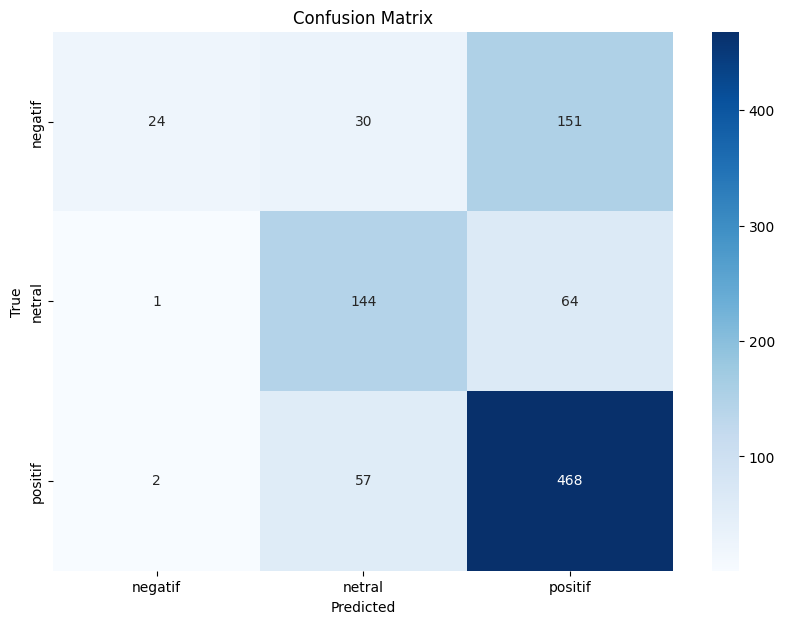

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, rf_test_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


###### Distiribusi Kelas Pada Data Awal terhadap data latih dan data uji

In [ ]:
# Melihat distribusi kelas dalam data lengkap
print("Distribusi kelas data lengkap:")
print(data['sentiment'].value_counts())

# Mendefinisikan variabel alias untuk y_train dan y_test
data_latih = y_train
data_uji = y_test

# Melihat distribusi kelas dalam data latih
print("Distribusi kelas data latih:")
print(data_latih.value_counts())

# Melihat distribusi kelas dalam data uji
print("Distribusi kelas data uji:")
print(data_uji.value_counts())


Distribusi kelas data lengkap:
sentiment
positif    1715
netral      732
negatif     689
Name: count, dtype: int64
Distribusi kelas data latih:
sentiment
positif    1188
netral      523
negatif     484
Name: count, dtype: int64
Distribusi kelas data uji:
sentiment
positif    527
netral     209
negatif    205
Name: count, dtype: int64


---
## **Evaluation**
---

### Data Testing

#### Tuning Hyperparameter (RandomizedSearchCV) dan Teknik Sampling Random Under Sampler

Distribusi kelas sebelum undersampling: Counter({'positif': 1188, 'netral': 523, 'negatif': 484})
Distribusi kelas setelah undersampling: Counter({'negatif': 484, 'netral': 484, 'positif': 484})


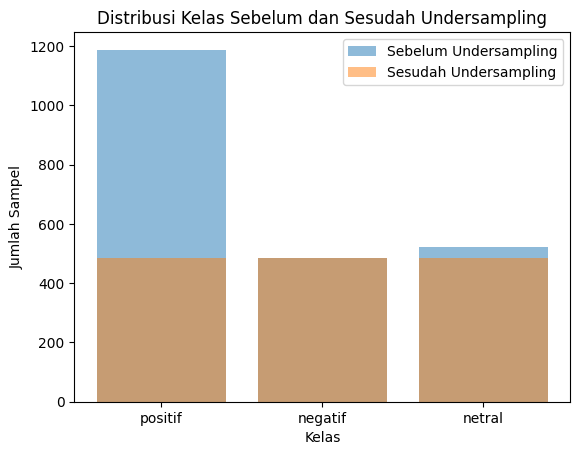

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}
Best cross-validation score: 0.65
Test Accuracy: 0.6153028692879915
Classification Report:
               precision    recall  f1-score   support

     negatif       0.47      0.59      0.52       205
      netral       0.49      0.84      0.62       209
     positif       0.87      0.54      0.66       527

    accuracy                           0.62       941
   macro avg       0.61      0.65      0.60       941
weighted avg       0.70      0.62      0.62       941



In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Membagi data menjadi data latih 70% dan data uji 30%
X_train, X_test, y_train, y_test = train_test_split(data['teks'], data['sentiment'], test_size=0.30, random_state=42)

# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Mendapatkan jumlah sampel di kelas minoritas
minority_count = min(y_train.value_counts().values)

# Mengatur strategi pengurangan untuk kelas mayoritas agar sama dengan jumlah sampel kelas minoritas
undersample_strategy = {label: minority_count for label in y_train.unique()}
undersampler = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)

# Melakukan undersampling pada data latih
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_vec, y_train)

# Menampilkan distribusi kelas sebelum dan setelah undersampling
print('Distribusi kelas sebelum undersampling:', Counter(y_train))
print('Distribusi kelas setelah undersampling:', Counter(y_train_resampled))

# Menggabungkan diagram batang distribusi kelas sebelum dan setelah undersampling
fig, ax = plt.subplots()
counts_before = Counter(y_train)
counts_after = Counter(y_train_resampled)
labels = list(counts_before.keys())

ax.bar(labels, [counts_before[label] for label in labels], alpha=0.5, label='Sebelum Undersampling')
ax.bar(labels, [counts_after[label] for label in labels], alpha=0.5, label='Sesudah Undersampling')

ax.set_xlabel('Kelas')
ax.set_ylabel('Jumlah Sampel')
ax.set_title('Distribusi Kelas Sebelum dan Sesudah Undersampling')
ax.legend()

plt.show()

# Inisialisasi model Random Forest dan menentukan grid parameter untuk RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

# Inisialisasi RandomizedSearchCV dengan spesifikasi pencarian
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,  # Jumlah iterasi kombinasi parameter yang akan dicoba
    cv=5,        # Jumlah fold untuk cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Melakukan pencarian hyperparameter menggunakan data yang telah di-resample
random_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Evaluasi model dengan parameter terbaik pada data pengujian
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test_vec)
print("Test Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Confusion Matrix:
[[120  52  33]
 [ 24 176   9]
 [113 131 283]]


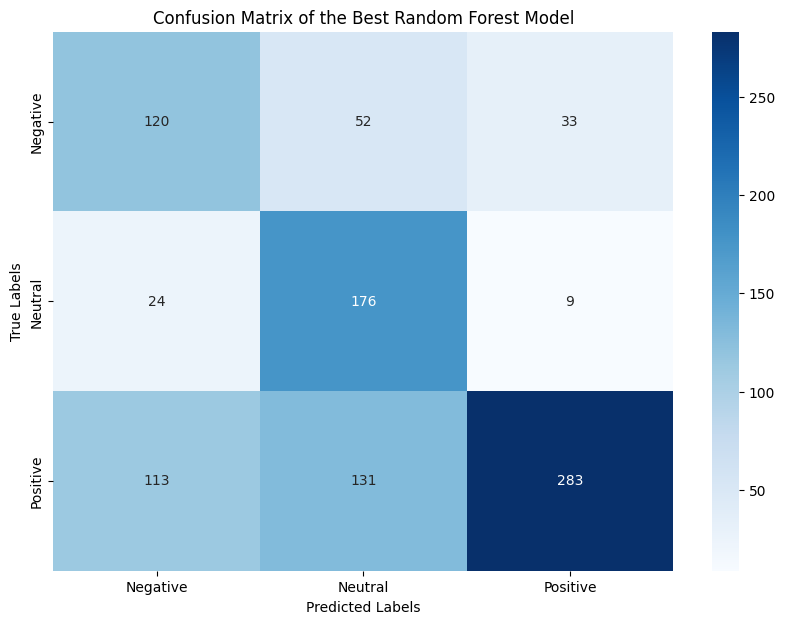

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Menampilkan confusion matrix sebagai output teks
print("Confusion Matrix:")
print(conf_matrix)

# Visualisasi Confusion Matrix menggunakan seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of the Best Random Forest Model')
plt.show()

In [ ]:
import pandas as pd

# Membuat DataFrame dengan hasil prediksi dan data asli
results_df = pd.DataFrame({
    'text': X_test,  # Pastikan X_test sudah didefinisikan sebelumnya
    'true_sentiment': y_test,  # Pastikan y_test sudah didefinisikan sebelumnya
    'predicted_sentiment': predictions  # Pastikan predictions sudah didefinisikan sebelumnya
})

# Menyimpan DataFrame ke file CSV
results_df.to_csv('model_predictions.csv', index=False)

# Menampilkan lima baris pertama dari DataFrame
display(results_df.tail(10))


,text,true_sentiment,predicted_sentiment
1572,"This presidential candidate's presidential debate, support came and said it was crazy to be applauded",positif,positif
1001,"Gibran, vice presidential debate, Nusron Wahid, ready to sleep well, eat well, laugh",positif,positif
340,campaign sign of losing paslon belah looks like ade armando hina yogya sulfuric acid milk uht cfd emotional presidential debate provocation watch the presidential debate your rude diction viral,negatif,positif
1174,"presidential debate, just count the number of blimbing vegetables excuses guys, why don't you come to the debate, the big toe is swollen, the hotel location, the venue is threatened with an explosion, the earth is attacked by a ufo, God is sent to advance the apocalypse",negatif,negatif
1744,"Pancasila precepts religion guides election manners, arrogance runs rampant in debates, looking at wrong candidates, low candidates, sarcastic lips",negatif,negatif
748,Please watch the video to understand the valid information,positif,netral
1187,I was looking for snacks and didn't finish until the vice presidential debate segment,netral,netral
662,Gibran scolds the KPU following the reaction to the presidential debate,netral,netral
480,let's go genz see the presidential debate presidential candidate choose so choose the one who governs the country of global geopolitical power dad gas win turn keel,positif,positif
803,Presidential candidate Prabowo Subianto's appearance in Tuesday's first debate KPU highlights among millennials language style of presidential candidates presidential candidate Prabowo Subianto's serial number Values ​​easy to understand and digest,positif,positif


In [ ]:
# import pandas as pd

# # Membuat DataFrame dengan hasil prediksi dan data asli
# results_df = pd.DataFrame({
#     'text': X_test,
#     'true_sentiment': y_test,
#     'predicted_sentiment': predictions
# })

# # Menyimpan DataFrame ke file CSV
# results_df.to_csv('model_predictions.csv', index=False)

# print("Hasil prediksi telah disimpan ke file 'model_predictions.csv'.")


Hasil prediksi telah disimpan ke file 'model_predictions.csv'.


In [ ]:
# # Fungsi untuk menguji model dengan kalimat baru
# def predict_new_sentence(model, vectorizer, new_sentence):
#     # Mengubah kalimat baru menjadi fitur numerik dengan vectorizer yang sama
#     new_sentence_vec = vectorizer.transform([new_sentence])

#     # Melakukan prediksi dengan model
#     prediction = model.predict(new_sentence_vec)

#     return prediction

# # Contoh kalimat baru untuk pengujian
# new_sentence = "I Support Prabowo"

# # Menggunakan model terbaik dari RandomizedSearchCV untuk melakukan prediksi
# predicted_class = predict_new_sentence(best_model, vectorizer, new_sentence)
# print("Kelas prediksi untuk kalimat baru:", predicted_class)

Kelas prediksi untuk kalimat baru: ['positif']


In [ ]:
# # Fungsi untuk menguji model dengan kalimat baru
# def predict_new_sentence(model, vectorizer, new_sentence):
#     # Mengubah kalimat baru menjadi fitur numerik dengan vectorizer yang sama
#     new_sentence_vec = vectorizer.transform([new_sentence])

#     # Melakukan prediksi dengan model
#     prediction = model.predict(new_sentence_vec)

#     return prediction

# # Contoh kalimat baru untuk pengujian
# new_sentence = "I dont like prabowo"

# # Menggunakan model terbaik dari RandomizedSearchCV untuk melakukan prediksi
# predicted_class = predict_new_sentence(best_model, vectorizer, new_sentence)
# print("Kelas prediksi untuk kalimat baru:", predicted_class)


Kelas prediksi untuk kalimat baru: ['positif']


In [ ]:
# # Fungsi untuk menguji model dengan kalimat baru
# def predict_new_sentence(model, vectorizer, new_sentence):
#     # Mengubah kalimat baru menjadi fitur numerik dengan vectorizer yang sama
#     new_sentence_vec = vectorizer.transform([new_sentence])

#     # Melakukan prediksi dengan model
#     prediction = model.predict(new_sentence_vec)

#     return prediction

# # Contoh kalimat baru untuk pengujian
# new_sentence = "I don't support Prabowo"

# # Menggunakan model terbaik dari RandomizedSearchCV untuk melakukan prediksi
# predicted_class = predict_new_sentence(best_model, vectorizer, new_sentence)
# print("Kelas prediksi untuk kalimat baru:", predicted_class)


Kelas prediksi untuk kalimat baru: ['positif']


---
## **Deployment Dashboard**
---

## Debat 1

## Merged all dataset

In [ ]:
# Memuat data dari file CSV pertama
file_awal = '/content/drive/MyDrive/data/Debat 1/Data Clean/Sentimen/Debat1.csv'
data_awal = pd.read_csv(file_awal)

# Memuat data dari file CSV kedua
file_preprocessing = '/content/drive/MyDrive/data/Debat 1/Data NLP/debat1_Hasil_Preprocessing_NLP.csv'
data_preprocessing = pd.read_csv(file_preprocessing)

# Memuat data normalisasi
file_normalisasi = '/content/drive/MyDrive/data/Debat 1/Data NLP/Debat1_NLP.csv'
data_normalisasi = pd.read_csv(file_normalisasi)

# Memuat data sentiment
file_sentiment = '/content/drive/MyDrive/data/Debat 1/Labelling_Debat_Paslon.csv'
data_sentiment = pd.read_csv(file_sentiment)

# Menggabungkan kolom dari data_preprocessing ke data_awal berdasarkan 'full_text'
data_gabungan = data_awal.merge(data_preprocessing[['full_text', 'cleansing', 'Tokenization and Case Folding', 'Filtering/stopwords removal', 'stemming_data']], on='full_text', how='left')

# Menggabungkan kolom dari data_normalisasi
data_gabungan = data_gabungan.merge(data_normalisasi[['stemming_data', 'Kata_Tidak_Baku', 'Kata_Baku', 'normalisasi','teks']], on='stemming_data', how='left')

# Menggabungkan kolom dari data_sentiment
data_gabungan = data_gabungan.merge(data_sentiment[['teks', 'sentiment_score', 'sentiment', 'Paslon']], on='teks', how='left')

# Mengatur urutan kolom
kolom_awal = data_awal.columns.tolist()  # Dapatkan semua kolom dari data_awal
index_full_text = kolom_awal.index('full_text')  # Temukan indeks untuk 'full_text'

# Sisipkan kolom preprocessing dan kolom baru tepat setelah 'full_text'
kolom_baru = kolom_awal[:index_full_text + 1] + ['cleansing', 'Tokenization and Case Folding', 'Filtering/stopwords removal', 'stemming_data', 'Kata_Tidak_Baku', 'Kata_Baku', 'normalisasi', 'teks', 'sentiment_score', 'sentiment', 'Paslon'] + kolom_awal[index_full_text + 1:]
data_gabungan = data_gabungan.reindex(columns=kolom_baru)

# Menyimpan data gabungan ke file baru
data_gabungan.to_csv('/content/drive/MyDrive/data/Debat 1/Data setelah analysis merged/Debat_1.csv', index=False)


#### Feature Selection

In [ ]:
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data setelah analysis merged/Debat_1.csv'

# Membaca data dari file CSV
debat = pd.read_csv(path_to_csv)

drop_kolom_debat = ['date_day','date_month','date_year']

# Menghapus kolom-kolom tertentu dari DataFrame
debat = debat.drop(columns=drop_kolom_debat)

# Menyimpan DataFrame yang diperbarui kembali ke CSV
debat.to_csv(path_to_csv, index=False)  # Menyimpan tanpa indeks

#### Feature Engineering

In [ ]:
# Mengasumsikan kamu sudah tahu path ke file CSV yang kamu inginkan
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data setelah analysis merged/Debat_1.csv'

# Membaca data dari file CSV
df = pd.read_csv(path_to_csv)

# Konversi kolom 'date' ke datetime
df['date'] = pd.to_datetime(df['date'])

# Menentukan indeks kolom 'date'
index_date = df.columns.get_loc('date') + 1

# Menambahkan kolom 'date_day', 'date_month', 'date_year' setelah 'date'
df.insert(index_date, 'date_day', df['date'].dt.day)
df.insert(index_date + 1, 'date_month', df['date'].dt.month)
df.insert(index_date + 2, 'date_year', df['date'].dt.year)

# Mengubah tipe data kolom date menjadi datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')  # Sesuaikan format dengan format tanggal yang ada

# Menyimpan DataFrame yang diperbarui kembali ke CSV
df.to_csv(path_to_csv, index=False)  # Menyimpan tanpa indeks

print("DataFrame telah berhasil diperbarui dengan kolom baru dan disimpan kembali ke file.")



DataFrame telah berhasil diperbarui dengan kolom baru dan disimpan kembali ke file.


#### a. Filtering Data by Date Range

In [ ]:
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data setelah analysis merged/Debat_1.csv'
df = pd.read_csv(path_to_csv)

# Rentang tanggal yang diinginkan
start_date = '2023-12-12'
end_date = '2023-12-21'

# Mengubah kolom 'date' menjadi datetime jika belum
df['date'] = pd.to_datetime(df['date'])

# Memfilter data agar hanya menyisakan tanggal yang berada dalam rentang yang diinginkan
data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Menampilkan hasil
(data)

data.to_csv(path_to_csv, index=False)  # Menyimpan tanpa indeks


#### b.Updating Column Names in Data File

In [ ]:
# Misalkan 'path_to_csv' adalah lokasi file CSV Anda
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data setelah analysis merged/Debat_1.csv'
df = pd.read_csv(path_to_csv)
# Mengganti nama kolom 'Paslon' menjadi 'Kandidat'
df.rename(columns={'Paslon': 'Kandidat'}, inplace=True)
# Menyimpan perubahan ke file baru atau menimpa yang lama
df.to_csv(path_to_csv, index=False)

#### c. Labelling Paslon

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Data inisialisasi dan pembuatan SentimentIntensityAnalyzer
data = SentimentIntensityAnalyzer()

# Memuat data dari file CSV
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data setelah analysis merged/Debat_1.csv'
df = pd.read_csv(path_to_csv)

# Pastikan bahwa semua data dalam kolom 'teks' adalah string
df['teks'] = df['teks'].astype(str)

# Fungsi untuk mengidentifikasi paslon
def identify_paslon(text):
    return 'Paslon'  # Misalnya kita set semua nilai menjadi 'Paslon'

# Menambahkan kolom 'Paslon' ke DataFrame
df['Paslon'] = df['teks'].apply(identify_paslon)

labels = []
scores = []

# Menghitung skor sentimen dan menentukan label
for text in df['teks']:
    sentiment_scores = data.polarity_scores(text)  # Menghitung skor sentimen
    compound_score = sentiment_scores['compound']  # Mengambil skor compound
    scores.append(compound_score)  # Menambahkan skor ke dalam daftar scores

    # Menentukan label berdasarkan skor compound
    if compound_score > 0:
        label = 'positif'
    elif compound_score < 0:
        label = 'negatif'
    else:
        label = 'netral'

    labels.append(label)  # Menambahkan label ke dalam daftar labels

# Menambahkan skor dan label ke DataFrame
df['sentiment_score'] = scores
df['sentiment'] = labels

# Aggregating the results by Paslon and sentiment
result = df.groupby(['Paslon', 'sentiment']).size().unstack(fill_value=0)

# Menampilkan hasil
print(result)

# Mengatur urutan kolom
columns_order = df.columns.tolist()
# Posisi 'Kandidat' + 1 untuk menempatkan 'Paslon' setelahnya
kandidat_index = columns_order.index('Kandidat') + 1
# Menyisipkan 'Paslon' ke posisi yang tepat
columns_order.insert(kandidat_index, columns_order.pop(columns_order.index('Paslon')))
df = df[columns_order]

# Menyimpan DataFrame ke file CSV baru
df.to_csv(path_to_csv, encoding='utf8', index=False)


sentiment  negatif  netral  positif
Paslon                             
Paslon         678    1120     1794


### Read Data Bigquery - Gcloud

In [ ]:
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data setelah analysis merged/Debat_1.csv'

df= pd.read_csv(path_to_csv)
df.head()

,date,date_day,date_month,date_year,favorite_count,full_text,cleansing,Tokenization and Case Folding,Filtering/stopwords removal,stemming_data,...,sentiment,Kandidat,Paslon,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,username
0,2023-12-20,20,12,2023,917,Selain debat capres cawapres sebenernya perlu ...,Selain debat capres cawapres sebenernya perlu ...,"['selain', 'debat', 'capres', 'cawapres', 'seb...","['debat', 'capres', 'cawapres', 'sebenernya', ...",debat capres cawapres sebenernya jg debat top ...,...,positif,OOC,Paslon,NaN,Indonesia,Unknown,65,53,221,rayestu
1,2023-12-20,20,12,2023,11,Anakku Gen-Z mengira debat capres kemarin adal...,Anakku GenZ mengira debat capres kemarin adala...,"['anakku', 'genz', 'mengira', 'debat', 'capres...","['anakku', 'genz', 'debat', 'capres', 'kemarin...",anak genz debat capres kemarin adu gagas progr...,...,positif,Paslon 2,Paslon,NaN,Indonesia,Indonesia,0,1,3,arifin34533
2,2023-12-20,20,12,2023,0,@grumpycatto_ Anjay serasa debat capres wkwkwk,Anjay serasa debat capres wkwkwk,"['anjay', 'serasa', 'debat', 'capres', 'wkwkwk']","['anjay', 'serasa', 'debat', 'capres', 'wkwkwk']",anjay serasa debat capres wkwkwk,...,positif,OOC,Paslon,grumpycatto_,Indonesia,Unknown,0,1,0,A_yaqin31
3,2023-12-20,20,12,2023,16,Gimana sih kesan warganet terhadap debat capre...,Gimana sih kesan warganet terhadap debat capre...,"['gimana', 'sih', 'kesan', 'warganet', 'terhad...","['gimana', 'sih', 'kesan', 'warganet', 'debat'...",gimana sih kesan warganet debat capres sistem ...,...,positif,OOC,Paslon,NaN,Indonesia,Unknown,1,4,8,kumparan
4,2023-12-20,20,12,2023,149,Calon wakil presiden (cawapres) nomor urut 1 M...,Calon wakil presiden cawapres nomor urut Muhai...,"['calon', 'wakil', 'presiden', 'cawapres', 'no...","['calon', 'wakil', 'presiden', 'cawapres', 'no...",calon wakil presiden cawapres nomor urut muhai...,...,positif,OOC,Paslon,NaN,Indonesia,Indonesia,2,216,46,tvOneNews


In [ ]:
df.shape

(3592, 25)

#### Rename Varibel NAN kolom kandidate

In [ ]:
import pandas as pd

# Memuat data dari file CSV
path_to_csv = '/content/drive/MyDrive/data/Debat 1/Data setelah analysis merged/Debat_1.csv'
df = pd.read_csv(path_to_csv)

# Mengganti NaN dengan 'OOC' di kolom 'Kandidat'
df['Kandidat'] = df['Kandidat'].fillna('OOC')

# Mengubah nilai dalam kolom 'location'
df['location'] = df['location'].replace({
    'England': 'United Kingdom',
    'West Africa': 'South Africa'
})
# Menyimpan perubahan kembali ke file yang sama
df.to_csv(path_to_csv, index=False)


In [ ]:
df.head()

,date,date_day,date_month,date_year,favorite_count,full_text,cleansing,Tokenization and Case Folding,Filtering/stopwords removal,stemming_data,...,sentiment,Kandidat,Paslon,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,username
0,2023-12-20,20,12,2023,917,Selain debat capres cawapres sebenernya perlu ...,Selain debat capres cawapres sebenernya perlu ...,"['selain', 'debat', 'capres', 'cawapres', 'seb...","['debat', 'capres', 'cawapres', 'sebenernya', ...",debat capres cawapres sebenernya jg debat top ...,...,positif,OOC,Paslon,NaN,Indonesia,Unknown,65,53,221,rayestu
1,2023-12-20,20,12,2023,11,Anakku Gen-Z mengira debat capres kemarin adal...,Anakku GenZ mengira debat capres kemarin adala...,"['anakku', 'genz', 'mengira', 'debat', 'capres...","['anakku', 'genz', 'debat', 'capres', 'kemarin...",anak genz debat capres kemarin adu gagas progr...,...,positif,Paslon 2,Paslon,NaN,Indonesia,Indonesia,0,1,3,arifin34533
2,2023-12-20,20,12,2023,0,@grumpycatto_ Anjay serasa debat capres wkwkwk,Anjay serasa debat capres wkwkwk,"['anjay', 'serasa', 'debat', 'capres', 'wkwkwk']","['anjay', 'serasa', 'debat', 'capres', 'wkwkwk']",anjay serasa debat capres wkwkwk,...,positif,OOC,Paslon,grumpycatto_,Indonesia,Unknown,0,1,0,A_yaqin31
3,2023-12-20,20,12,2023,16,Gimana sih kesan warganet terhadap debat capre...,Gimana sih kesan warganet terhadap debat capre...,"['gimana', 'sih', 'kesan', 'warganet', 'terhad...","['gimana', 'sih', 'kesan', 'warganet', 'debat'...",gimana sih kesan warganet debat capres sistem ...,...,positif,OOC,Paslon,NaN,Indonesia,Unknown,1,4,8,kumparan
4,2023-12-20,20,12,2023,149,Calon wakil presiden (cawapres) nomor urut 1 M...,Calon wakil presiden cawapres nomor urut Muhai...,"['calon', 'wakil', 'presiden', 'cawapres', 'no...","['calon', 'wakil', 'presiden', 'cawapres', 'no...",calon wakil presiden cawapres nomor urut muhai...,...,positif,OOC,Paslon,NaN,Indonesia,Indonesia,2,216,46,tvOneNews


In [ ]:
df.shape

(3592, 25)